# Project Name -   NETFLIX MOVIES AND TV SHOWS CLUSTERING

# Project Type - Unsupervised Machine Learning
# Contribution - Individual
# Name - Tushar Raskar
# GitHub Link
https://github.com/tusharraskar/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING.git

# Problem Statement
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010.

The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, we are required to do

1. Exploratory Data Analysis
2. Understanding what type content is available in different countries
3. Is Netflix has increasingly focus on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features
5. Recommendations 

# Attribute Information

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime
import re
import string
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
from nltk.corpus import stopwords  #stopwords
from nltk.tokenize import word_tokenize # tokenizing
from nltk.stem import WordNetLemmatizer  # lemmatizer from WordNet
import nltk 
nltk.download('punkt')
from collections import Counter

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer

#stop-words
# nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
# DImensionality Reduction
from wordcloud import WordCloud
from sklearn.decomposition import PCA
# Importing libraries for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#  Dataset Loading
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [3]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [4]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

In [5]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

We have 0 duplicate values in dataset.

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

This dataset have 10 categorical features and 1 numerical feature.

director column has highest NaN values 30.7% data is missing

cast, country , date_added , rating column has more than 10% NaN values

In order to treat missing values in director column we will fill the null values with unknown.

And in cast column we will fill the values with 'No cast'. country can be filled with mode value.

date added and rating are having very less missing values so they can be removed.

In [8]:
#HANDLING MISSING VALUES
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Understanding Variables

In [10]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include='O')

show_id   type title director     cast        country       date_added  \
count     7770   7770  7770     7770     7770           7770             7770   
unique    7770      2  7770     4048     6818            681             1563   
top         s1  Movie    3%  unknown  No cast  United States  January 1, 2020   
freq         1   5372     1     2376      718           3051              118   

       rating  duration      listed_in  \
count    7770      7770           7770   
unique     14       216            491   
top     TV-MA  1 Season  Documentaries   
freq     2861      1606            334   

                                              description  
count                                                7770  
unique                                               7752  
top     Multiple women report their husbands as missin...  
freq                                                    3

# Data Manipulation

In [12]:
# Create new features to store date, day, month and year separately.
df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.

df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...         14        2020   
1  After a devastating earthquake hits Mexico Cit...         23        2016   
2  When an army recruit is found dead, his fellow...         20        2018   
3  In a postapocalyptic world, rag-doll robots hi...         16        2017   
4  A brilliant group of students become card-coun...          1        2020   

   month_added  
0            8  
1           12  
2           12  
3           11  
4            1

## Handling Outliers

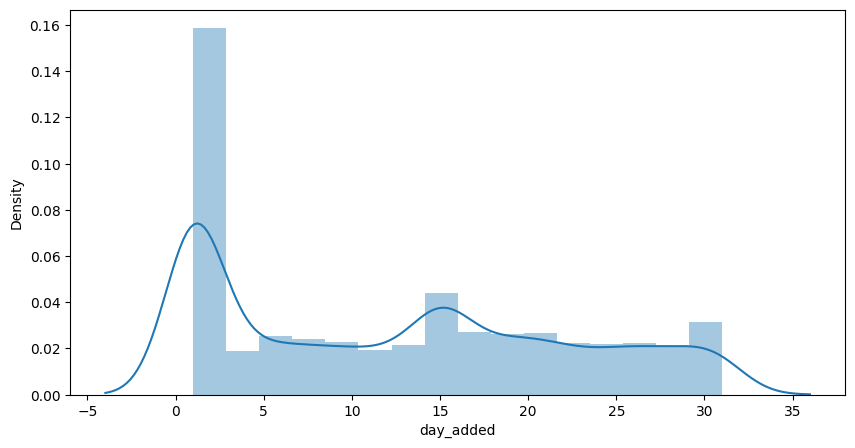

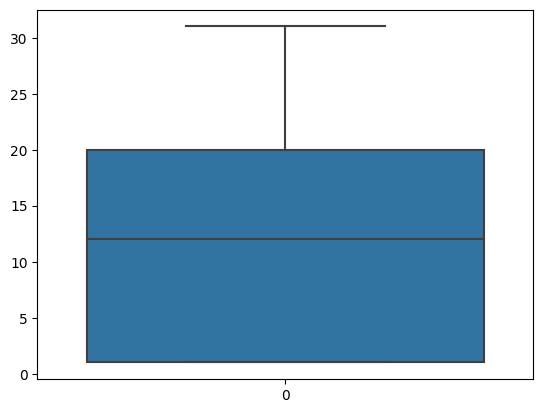

In [13]:
# Detection of Outliers day_added
plt.figure(figsize=(10,5))
sns.distplot(df['day_added'])
plt.show()
sns.boxplot(df['day_added'])
plt.show()

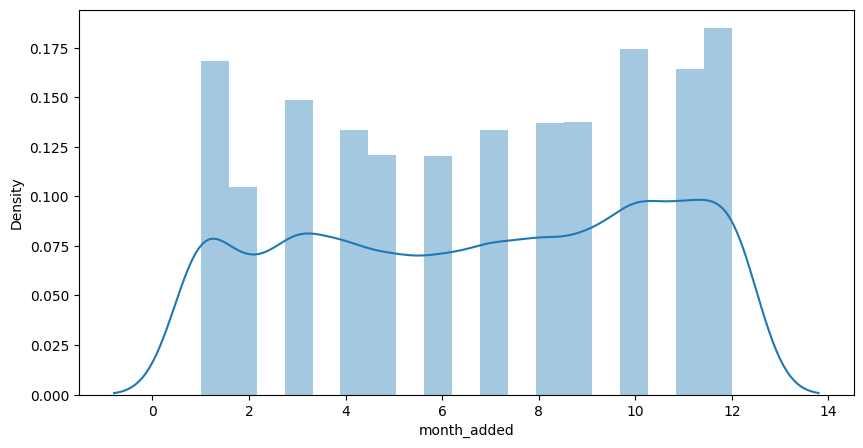

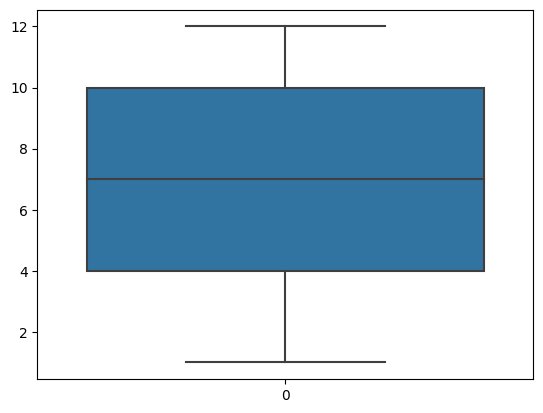

In [14]:
# Detection of  Outliers month_added
plt.figure(figsize=(10,5))
sns.distplot(df['month_added'])
plt.show()
sns.boxplot(df['month_added'])
plt.show()

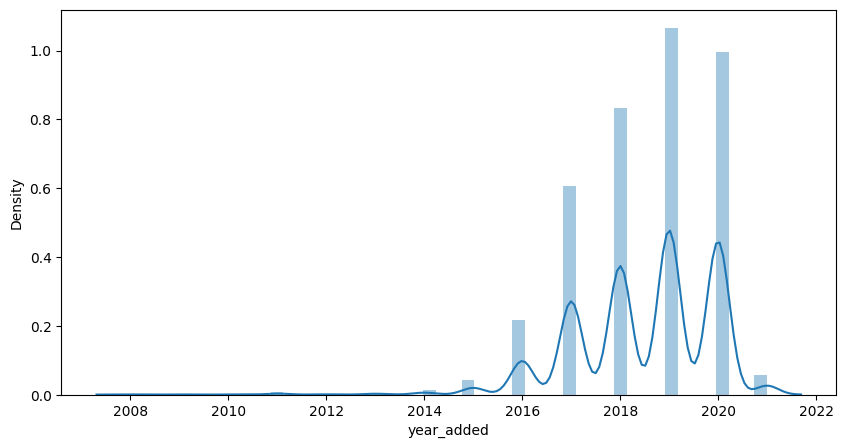

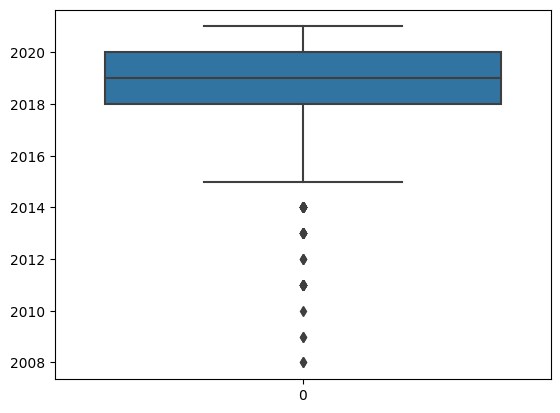

In [15]:
# Detection of  Outliers year_added
plt.figure(figsize=(10,5))
sns.distplot(df['year_added'])
plt.show()
sns.boxplot(df['year_added'])
plt.show()

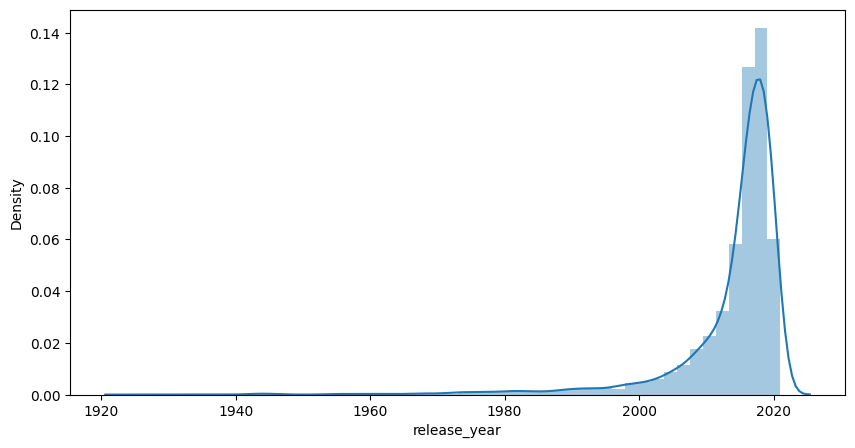

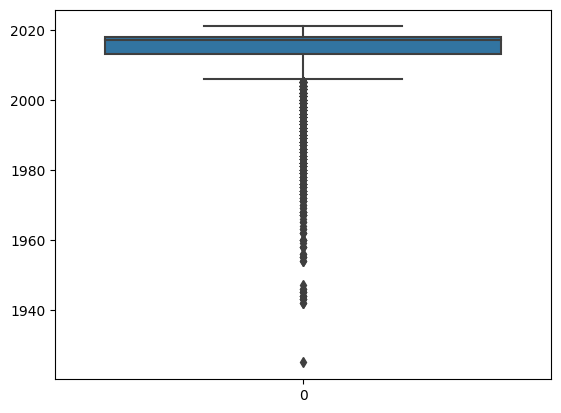

In [16]:
# Detection of  Outliers release_year
plt.figure(figsize=(10,5))
sns.distplot(df['release_year'])
plt.show()
sns.boxplot(df['release_year'])
plt.show()

### There are Outliers in column 'release year' and 'year added'. So we apply IQR method to treat Outliers.

In [17]:
for col in ['release_year','year_added']:#redefining the data and setting the outliers value with the range
  
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  
  df[col] = np.where(df[col] > upper_limit, median,np.where(
                         df[col] < lower_limit,median,np.where(
                         df[col] < lower_cap,lower_cap,np.where(
                         df[col] > upper_cap,upper_cap,df[col]))))

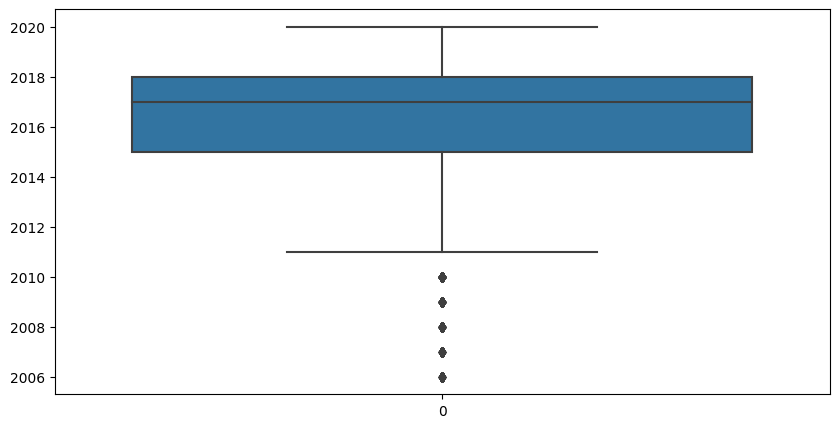

In [18]:
# Handling Outliers release_year
plt.figure(figsize=(10,5))

sns.boxplot(df['release_year'])
plt.show()

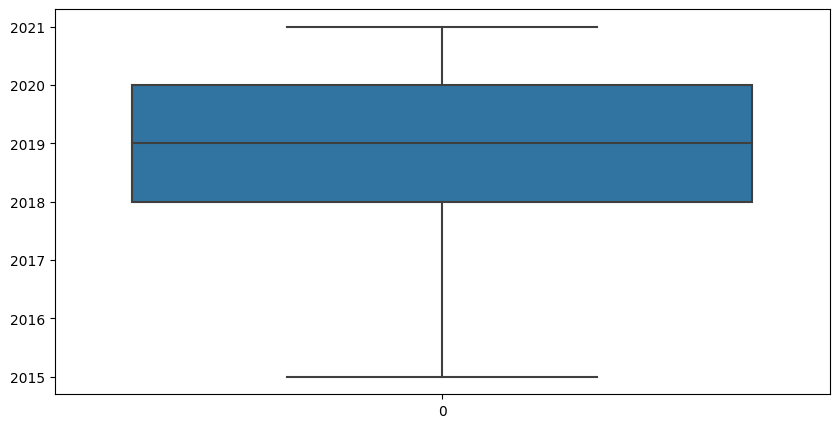

In [19]:
# Handling Outliers year_added
plt.figure(figsize=(10,5))
sns.boxplot(df['year_added'])
plt.show()

### We have created new features to store date, day, month and year separately. It will help us to distribute movies/TV shows monthwise and yearwise.

Then We have treated outliers using IQR method

# Data Vizualization

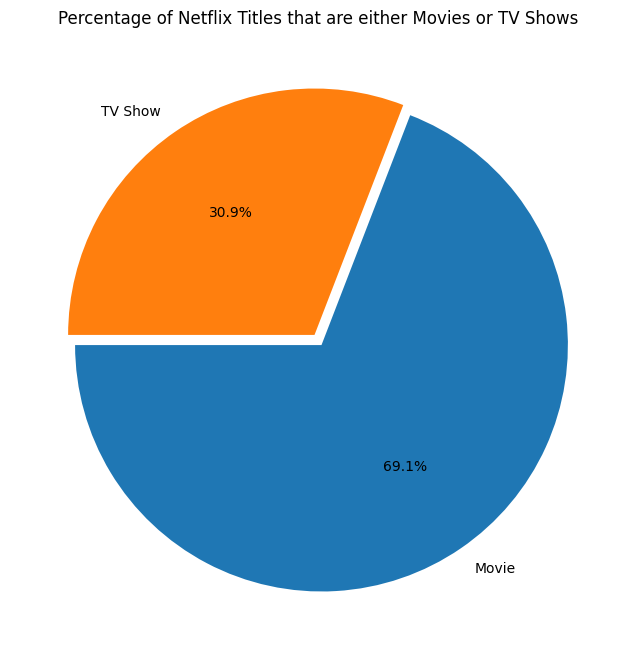

In [20]:
# Pie chart showing percentage of toal movies and TV shows.

plt.figure(figsize=(14,8))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")
plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels=df.type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

### 1. Why did you pick the specific chart?
Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

### 2. What is/are the insight(s) found from the chart?
69.1% of the content available on Netflix are movies and the remaining 30.9% are TV Shows

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It will help to gain insights to understand which type of content is available on Netflix.

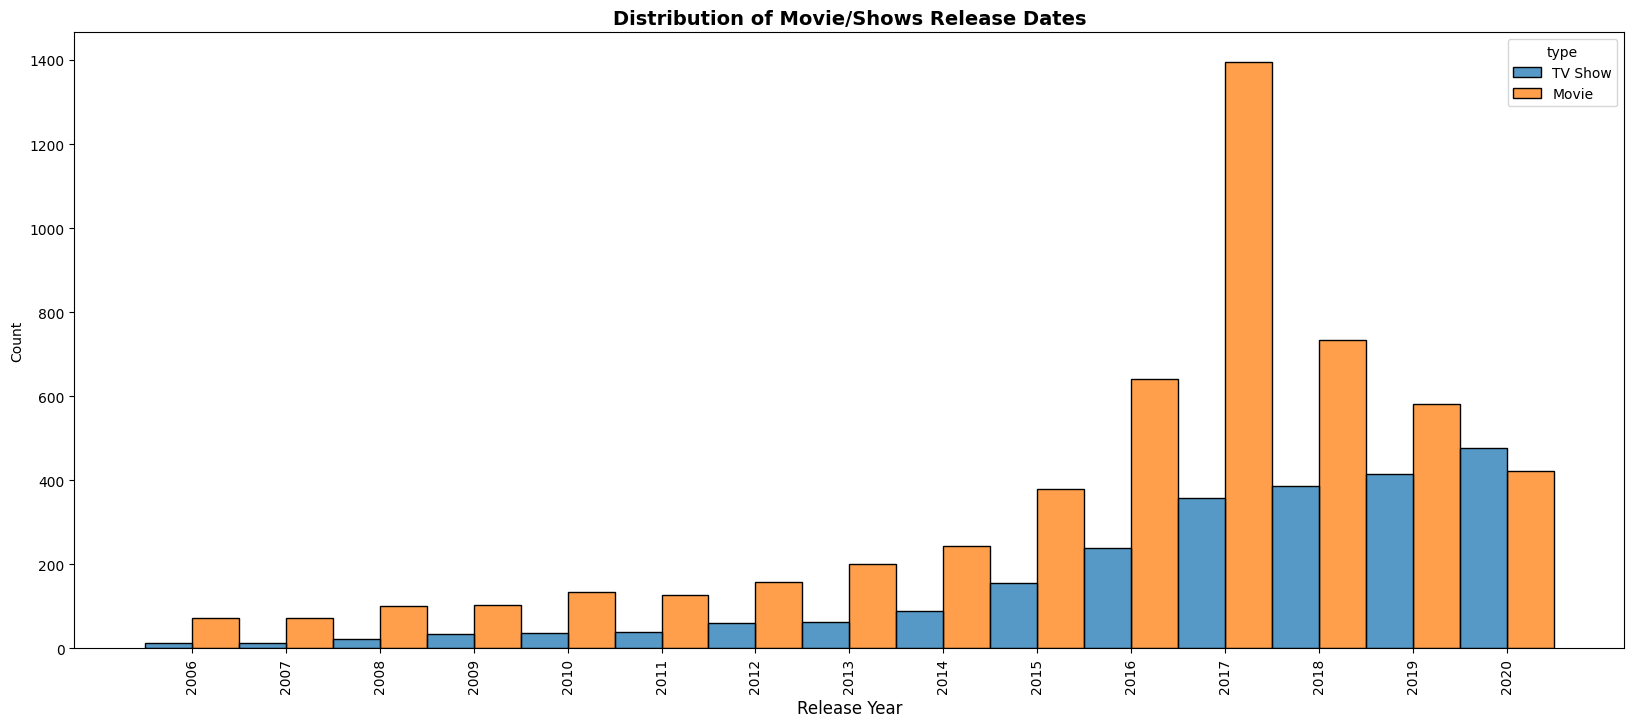

In [21]:
# Release year of Movies/TV Shows
a = plt.figure(figsize=(20,8))
a = sns.histplot(x='release_year', hue = 'type', multiple="dodge", data = df,discrete=True)
a = plt.xticks(ticks= np.arange(df.release_year.min(),df.release_year.max()+1,1), rotation = 90)
a = plt.title('Distribution of Movie/Shows Release Dates',fontsize = 14, fontweight='bold')
a = plt.xlabel('Release Year',fontsize = 12)

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
Maximum number of Movies streaming on the platform were released in 2017.
Most TV Shows streaming on the platform were released after 2015
Since the number of movies releasing each year has started decreasing after 2017 whereas number of TV Shows have increased gradually after 2015.
### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It will help to understand the distribution of Movie/Shows release year.

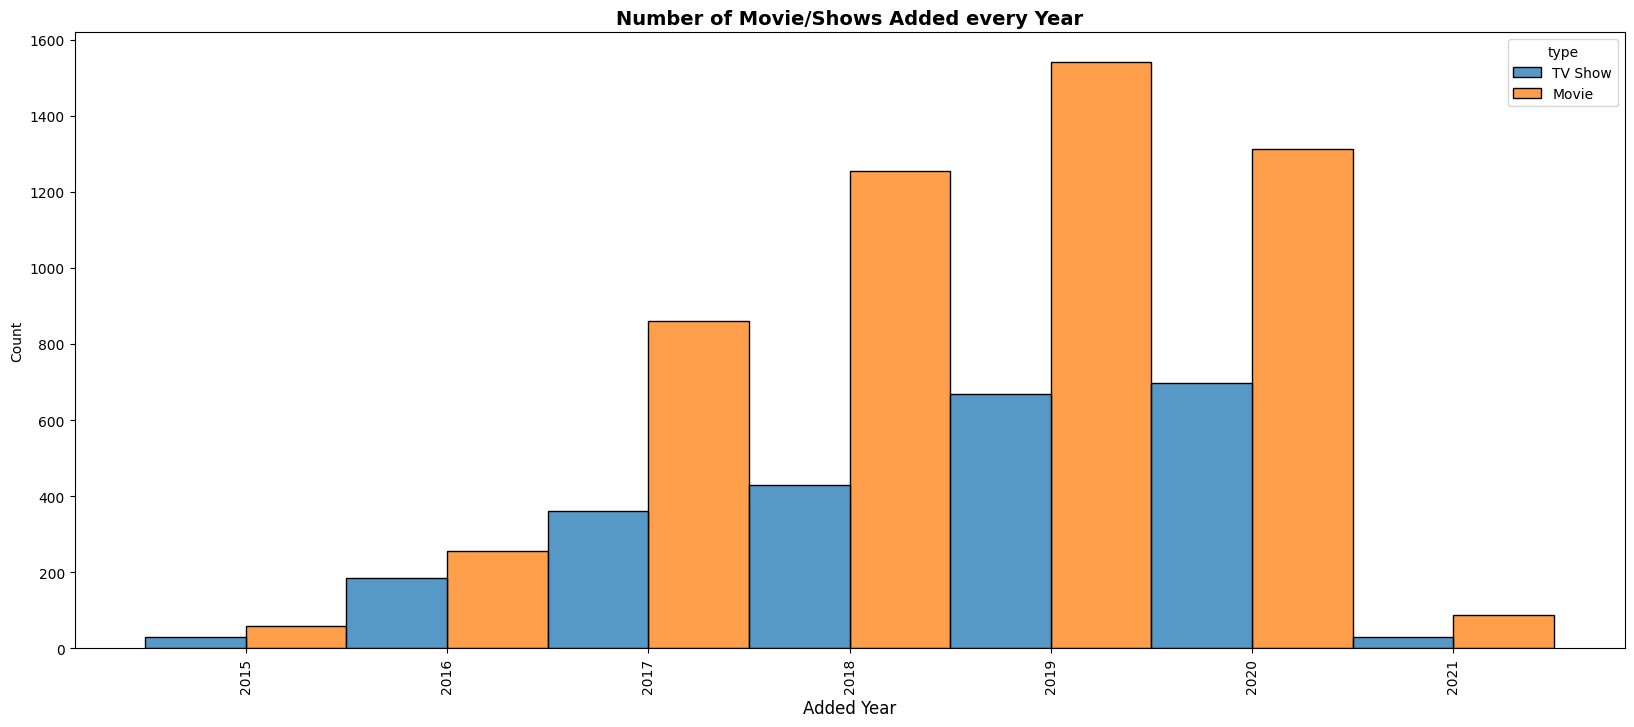

In [22]:
# Number of Movies/TV Shows added per Year
a = plt.figure(figsize=(20,8))
a = sns.histplot(x='year_added', hue = 'type', multiple="dodge", data = df,discrete=True)
a = plt.xticks(ticks= np.arange(df.year_added.min(),df.year_added.max()+1,1), rotation = 90)
a = plt.title('Number of Movie/Shows Added every Year',fontsize = 14, fontweight='bold')
a = plt.xlabel('Added Year',fontsize = 12)

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
Number of movies added to the platform showed a deliberate increase from 2017 to 2019 and has been decreased after that.
Whereas TV Shows have been added continuously from 2015 and its number been increased every year.
### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It will give an analysis in which year most number of Movies/Shows are added on Netflix.

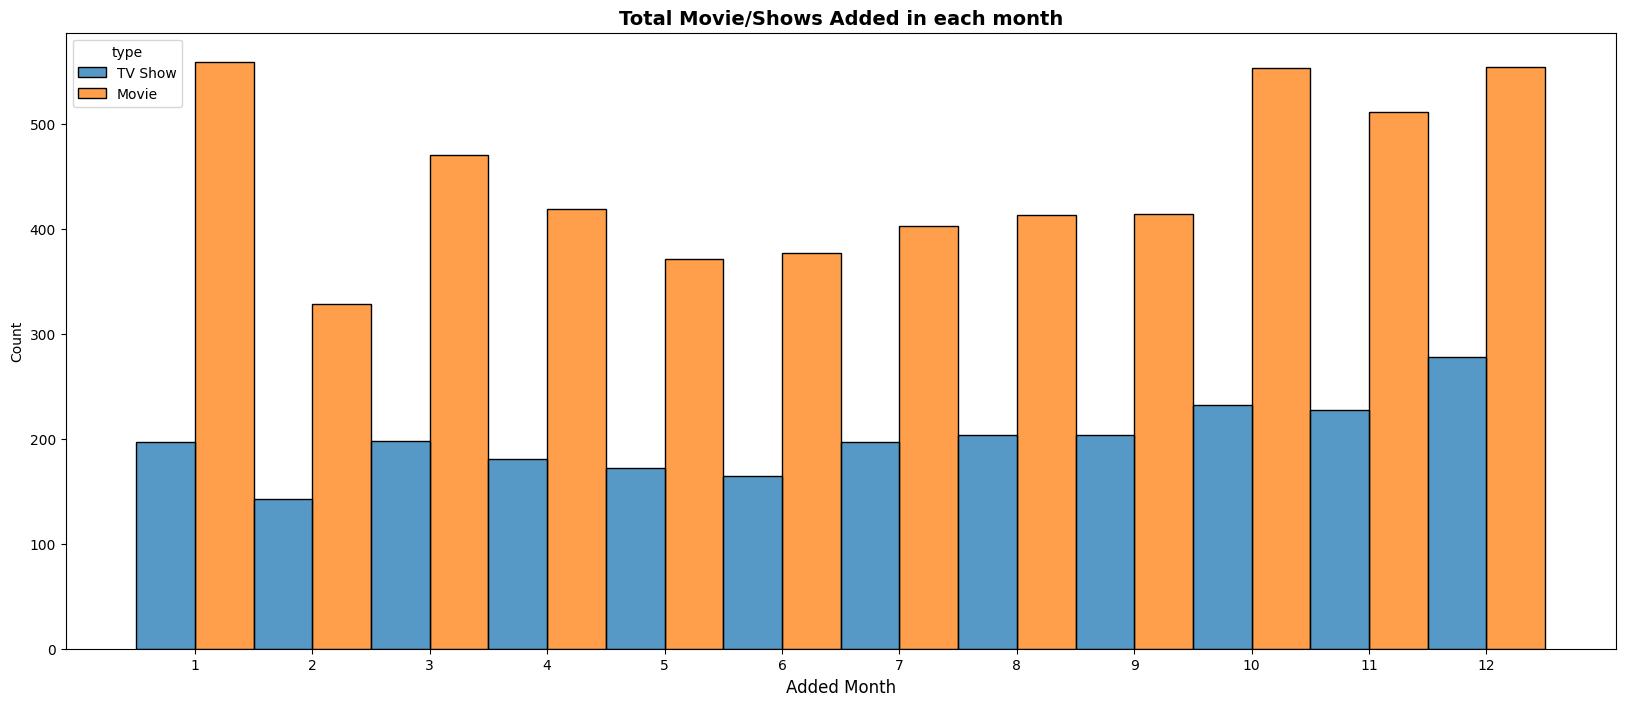

In [23]:
# Number of Movies/TV Shows added per Month
a = plt.figure(figsize=(20,8))
a = sns.histplot(x='month_added', hue = 'type', multiple="dodge", data = df,discrete=True, )
a = plt.xticks(ticks= np.arange(df.month_added.min(),df.month_added.max()+1,1))
a = plt.title('Total Movie/Shows Added in each month',fontsize = 14, fontweight='bold')
a = plt.xlabel('Added Month',fontsize = 12)

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
Most number of Movies and TV Shows are added between October and January

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It will give an analysis in which month most number of Movies/Shows are added on Netflix.

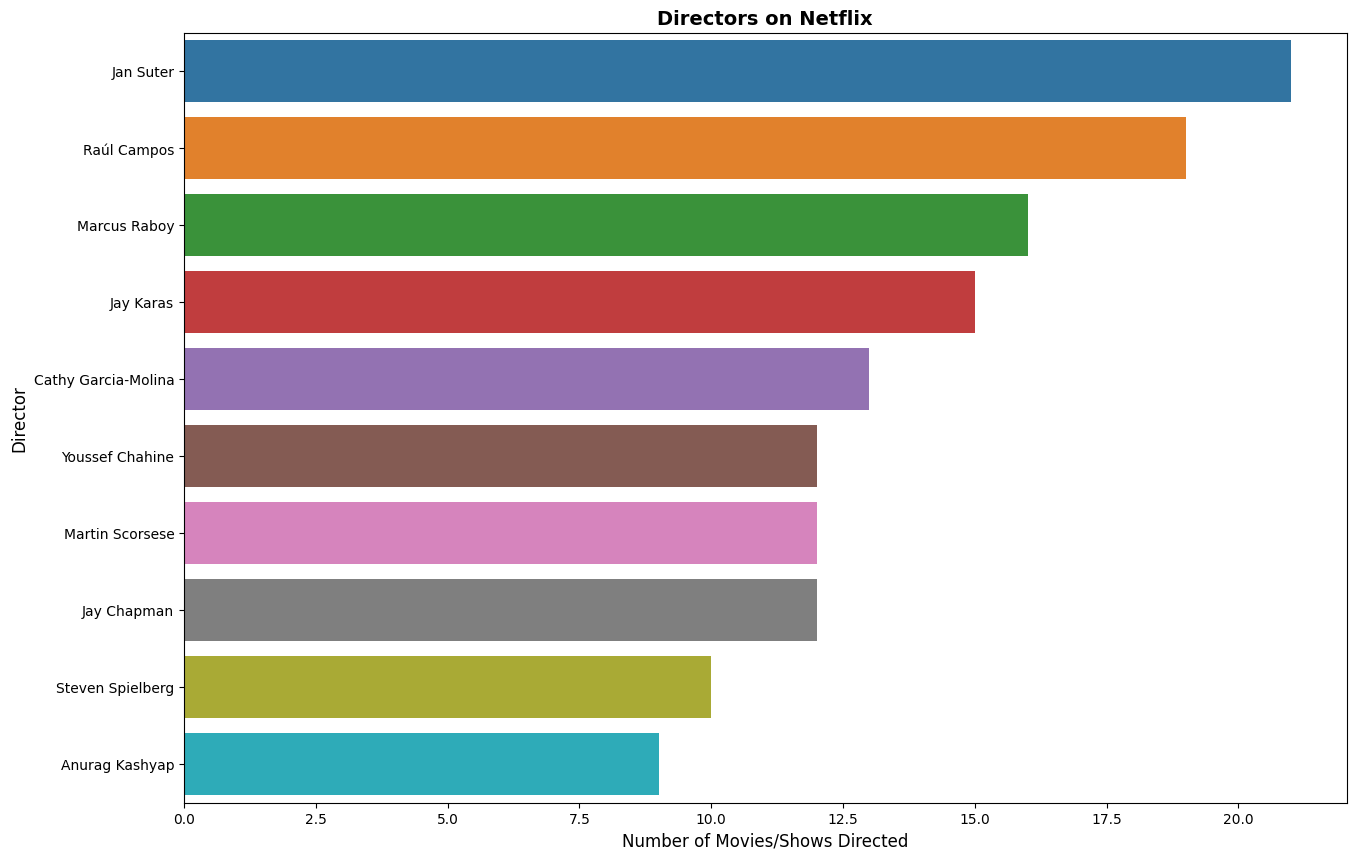

In [24]:
# Top 10 Directors
a=df[df.director != 'unknown'].loc[:,['show_id','title','director', 'cast']].copy()
director = (a['director'].to_list())

newlist = []
for genre in director:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Director' : newlist, 'show_id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Director').agg({'show_id':'count'}).sort_values('show_id', ascending= False).reset_index().head(10)
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Director', x = 'show_id',data = a ,)
a = plt.title('Directors on Netflix',fontsize = 14, fontweight='bold')
a = plt.ylabel('Director',fontsize = 12)
a = plt.xlabel('Number of Movies/Shows Directed',fontsize = 12)
top10directors = country_list.groupby('Director').agg({'show_id':'count'}).sort_values('show_id', ascending= False).reset_index().head(10)['Director'].to_list

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
Top 3 Directors are-

Jan Suter
Raul Campos
Marcus Raboy
### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes It will give an insight which director has directed most number of Movies/TV shows.

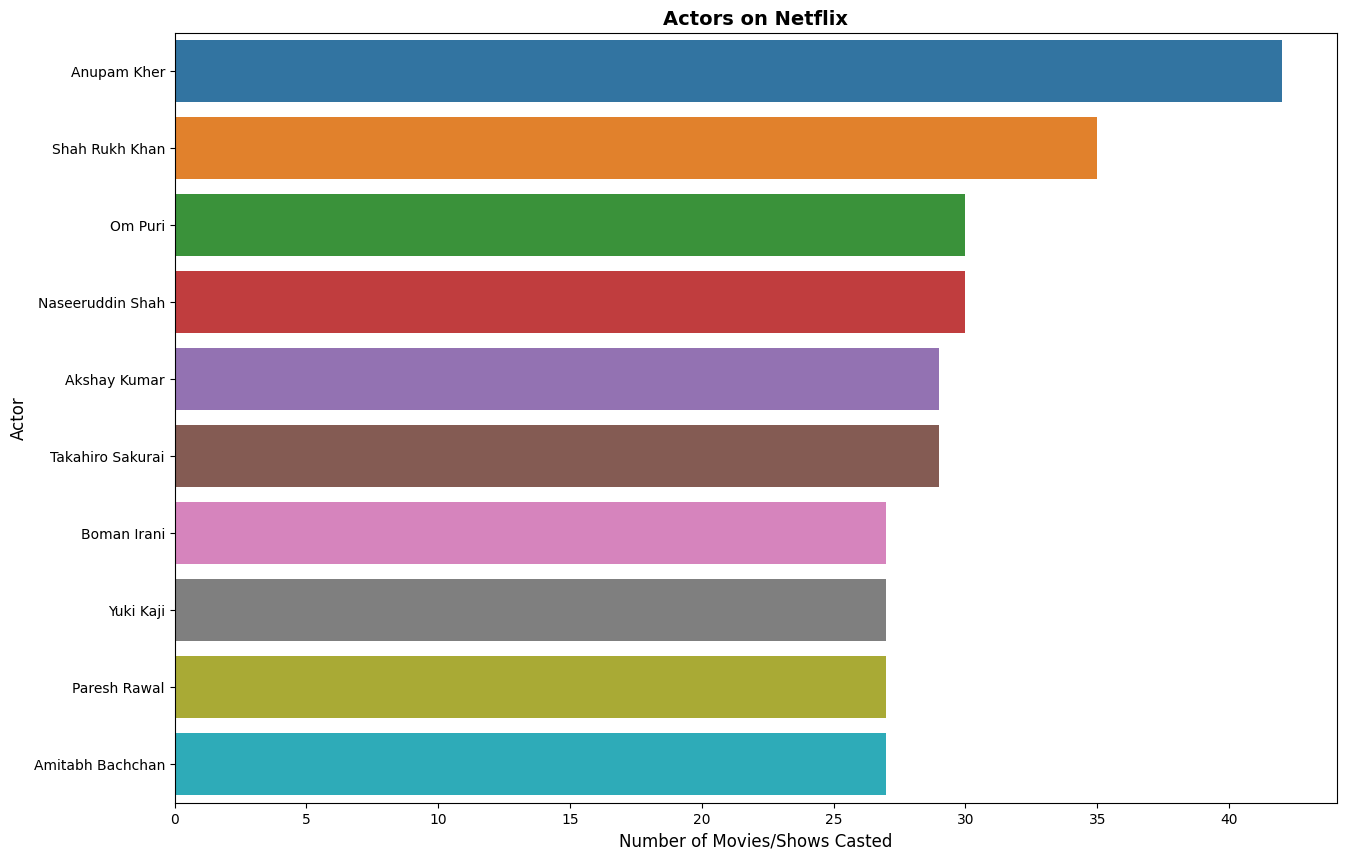

In [25]:
# Top 10 Actors
a=df[df.cast != 'No cast'].loc[:,['show_id','title','director', 'cast']].copy()
cast = (a['cast'].to_list())

newlist = []
for genre in cast:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Actor' : newlist, 'show_id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Actor').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Actor', x = 'show_id',data = a )
a = plt.title('Actors on Netflix',fontsize = 14, fontweight='bold')
a = plt.ylabel('Actor',fontsize = 12)
a = plt.xlabel('Number of Movies/Shows Casted',fontsize = 12)
top10actors = country_list.groupby('Actor').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(20).reset_index()['Actor'].to_list()

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
Top 3 Actors are

1. Anupam Kher

2. Shah Rukh Khan

3. Om Puri

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes It will give an insight which Actor has been casted most number of times.

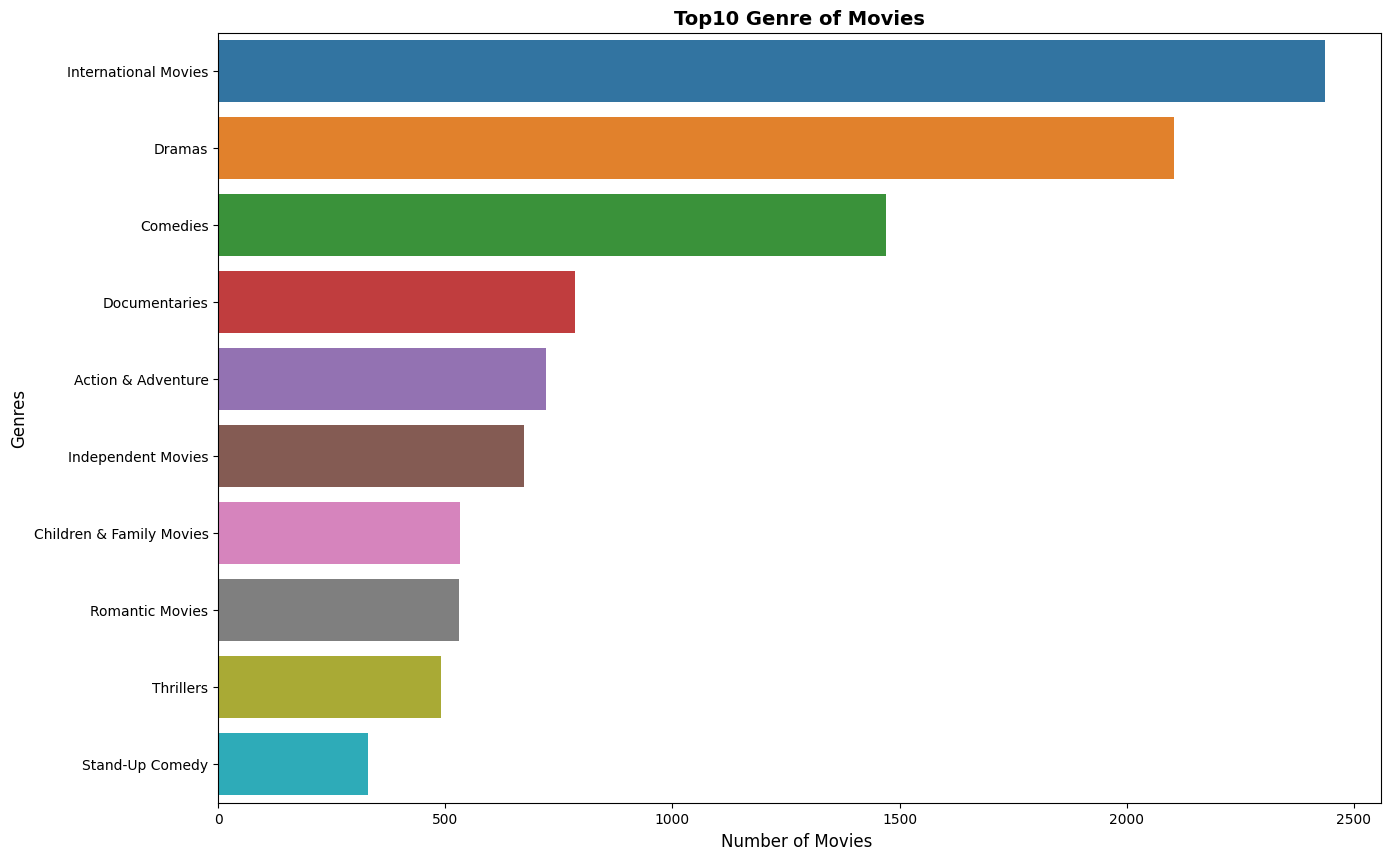

In [26]:
# Top 10 Genres of Netflix Movies
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']
a=movies.loc[:,['show_id','listed_in']].copy()
movie = (a['listed_in'].to_list())

movie_list = []
for genre in movie:
  if ',' in genre:
    a = genre.split(', ')
    movie_list = movie_list + a
  else:
    movie_list.append(genre)
movie_list = pd.DataFrame({'listed_in' : movie_list, 'show_id':np.arange(0,len(movie_list),1)})
a = movie_list.groupby('listed_in').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'listed_in', x = 'show_id',data = a )
a = plt.title('Top10 Genre of Movies',fontsize = 14, fontweight='bold')
a = plt.ylabel('Genres',fontsize = 12)
a = plt.xlabel('Number of Movies ',fontsize = 12)
top10_movie_genre = movie_list.groupby('listed_in').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()['listed_in'].to_list()

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
Top genres of netflix movies are International, Dramas and Comedy Movies.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes , It will give an insight that which movies are mostly liked on the platform.

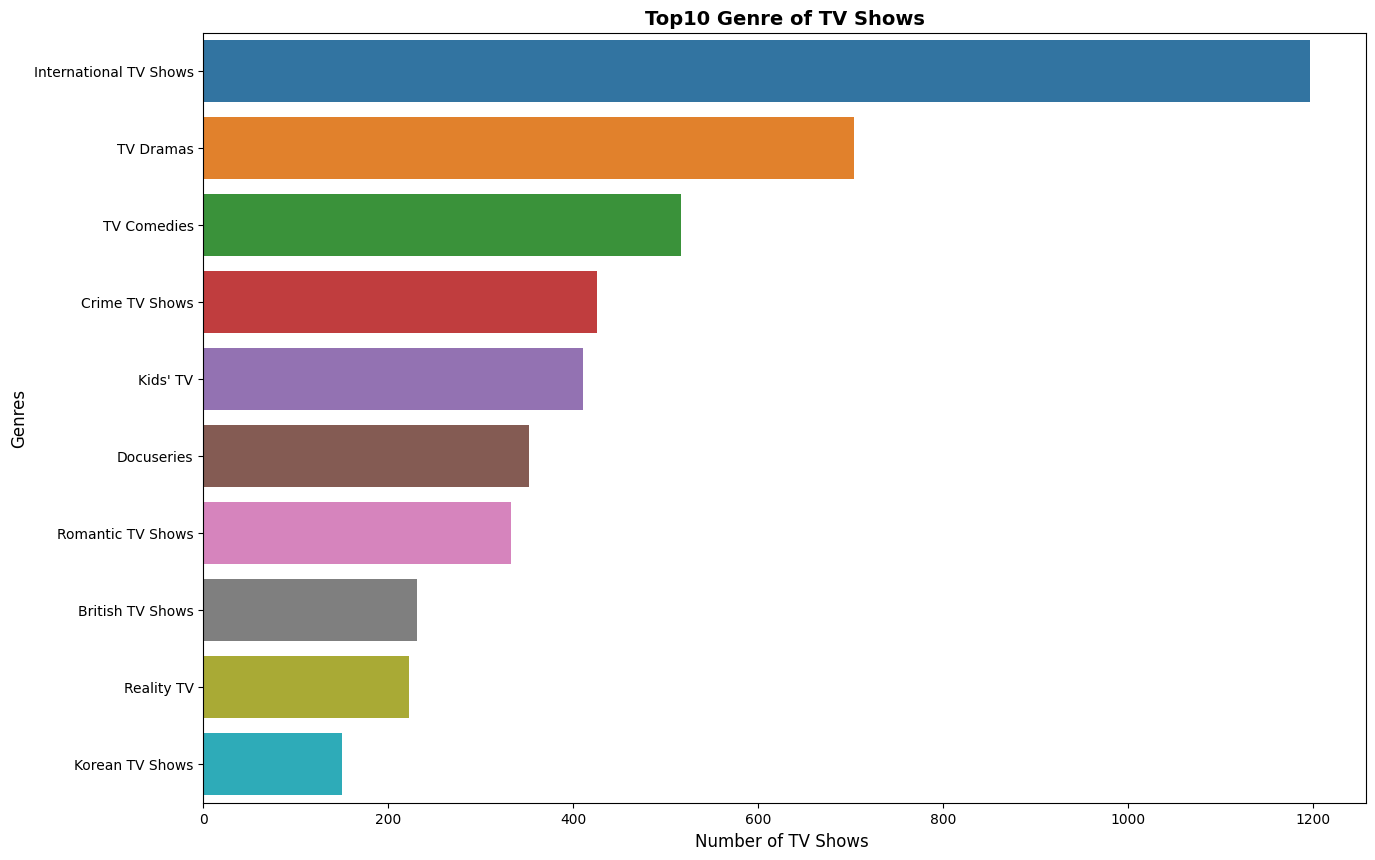

In [27]:
# Top 10 Genres of Netflix TV Shows
a=tv_shows.loc[:,['show_id','listed_in']].copy()
tv = (a['listed_in'].to_list())

tv_show_list = []
for genre in tv:
  if ',' in genre:
    a = genre.split(', ')
    tv_show_list = tv_show_list + a
  else:
    tv_show_list.append(genre)
tv_show_list = pd.DataFrame({'listed_in' : tv_show_list, 'show_id':np.arange(0,len(tv_show_list),1)})
a = tv_show_list.groupby('listed_in').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'listed_in', x = 'show_id',data = a )
a = plt.title('Top10 Genre of TV Shows',fontsize = 14, fontweight='bold')
a = plt.ylabel('Genres',fontsize = 12)
a = plt.xlabel('Number of TV Shows ',fontsize = 12)
top_10_tv_show_genre = tv_show_list.groupby('listed_in').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()['listed_in'].to_list()

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
Top genres of netflix TV Shows Are same as movies that are International, Dramas and Comedy TV Shows.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes , It will give an insight that which TV Shows are mostly liked on the platform.

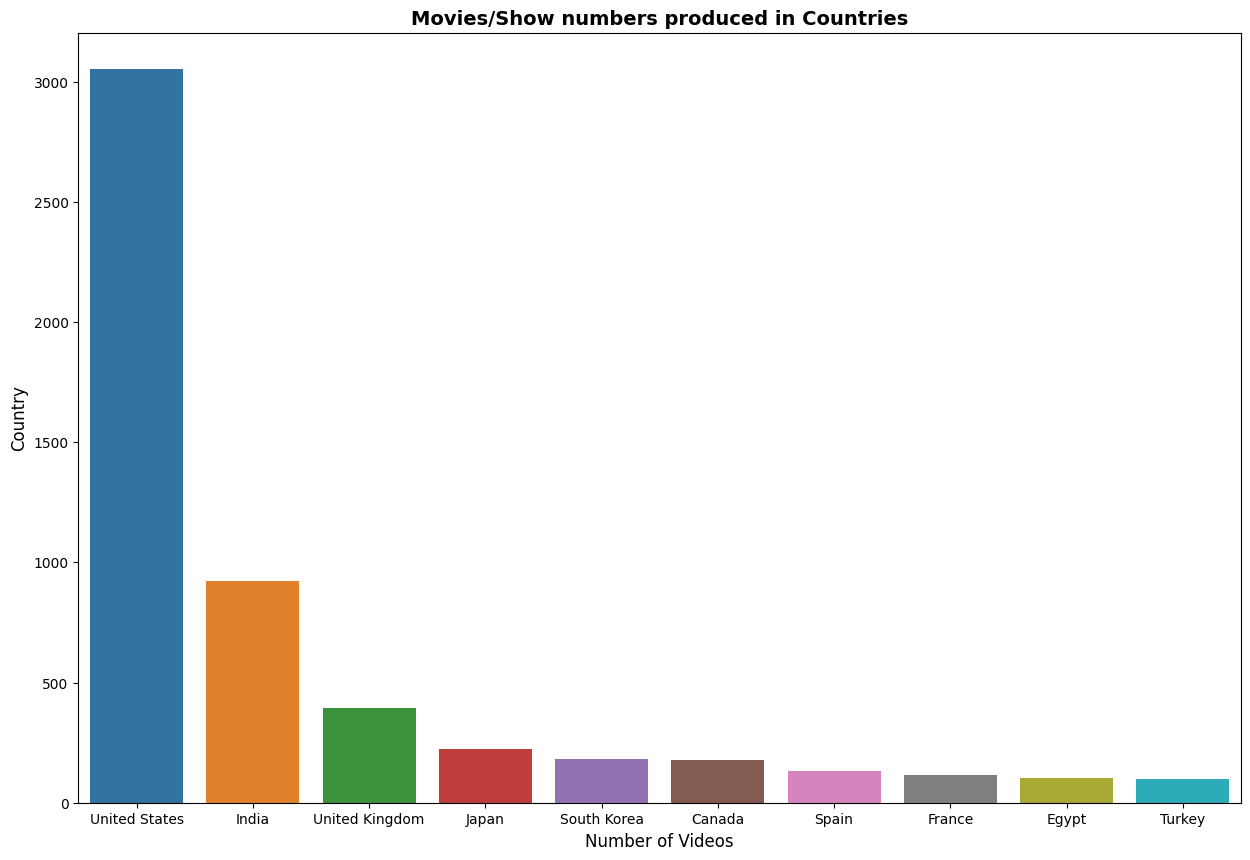

In [28]:
# Top 10 Countries producing content on Netflix
a = df.loc[:,['show_id','title','country']].copy()
country_list = (a['country'].to_list())

newlist = []
for country in country_list:
  if ',' in country:
    a = genre.split(', ')
    country_list = country_list + a
  else:
    newlist.append(country)

country_list = pd.DataFrame({'country' : newlist, 'show_id':np.arange(0,len(newlist),1)})
a = country_list.groupby('country').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(x = 'country', y = 'show_id',data = a )
a = plt.title('Movies/Show numbers produced in Countries',fontsize = 14, fontweight='bold')
a = plt.ylabel('Country',fontsize = 12)
a = plt.xlabel('Number of Videos',fontsize = 12)
top10countries = country_list.groupby('country').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()['country'].unique()

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
United States is the country producing maximum content on Netflix followed by India and UK.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, It will provide an insight that which country is producing maximum content on the platform.

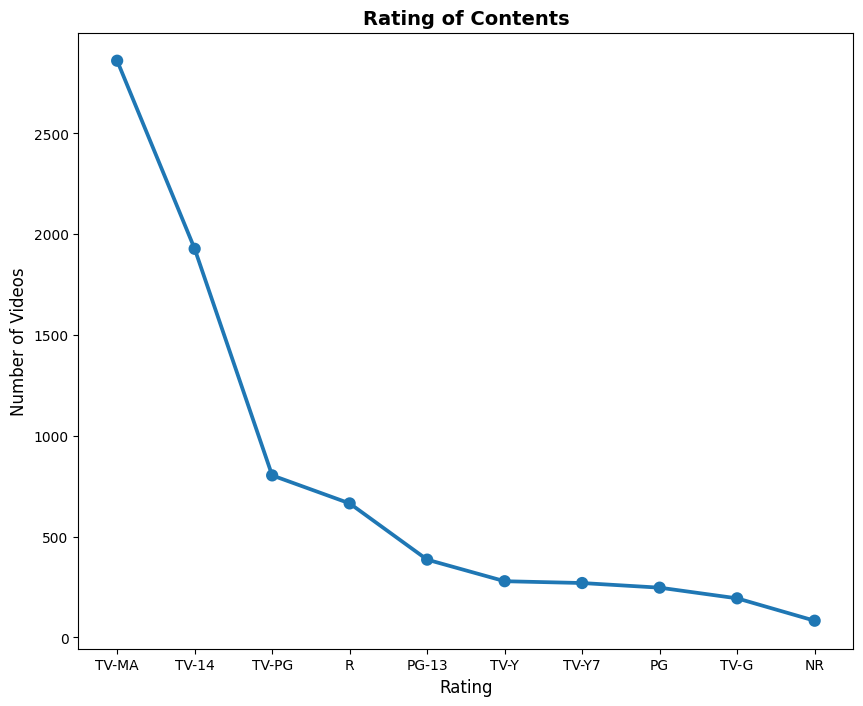

In [29]:
# Ratings of content
# Rating
a = df.loc[:,['show_id','title','rating']].copy()
rating_list = (a['rating'].to_list())

newlist = []
for rating in rating_list:
  newlist.append(rating)

rating_list = pd.DataFrame({'rating' : newlist, 'show_id':np.arange(0,len(newlist),1)})
a = rating_list.groupby('rating').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()
plt.figure(figsize=(10,8))
a = sns.pointplot(x = 'rating', y = 'show_id',data = a )
a = plt.title('Rating of Contents',fontsize = 14, fontweight='bold')
a = plt.xlabel('Rating',fontsize = 12)
a = plt.ylabel('Number of Videos',fontsize = 12)
top10countries = rating_list.groupby('rating').agg({'show_id':'count'}).sort_values('show_id', ascending= False).head(10).reset_index()['rating'].unique()

### 1. Why did you pick the specific chart?
A line plot is a useful tool for analyzing the trend and patterns in continuous data over time, which is why it may be a good choice for visualizing the bike sharing demand prediction data.


### 2. What is/are the insight(s) found from the chart?
Most content on Netflix is rated for Mature Audiences(MA) and over 14 years old

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes It will help us to understand which type of Netflix rating are mostly liked by its audience

<Figure size 800x800 with 0 Axes>

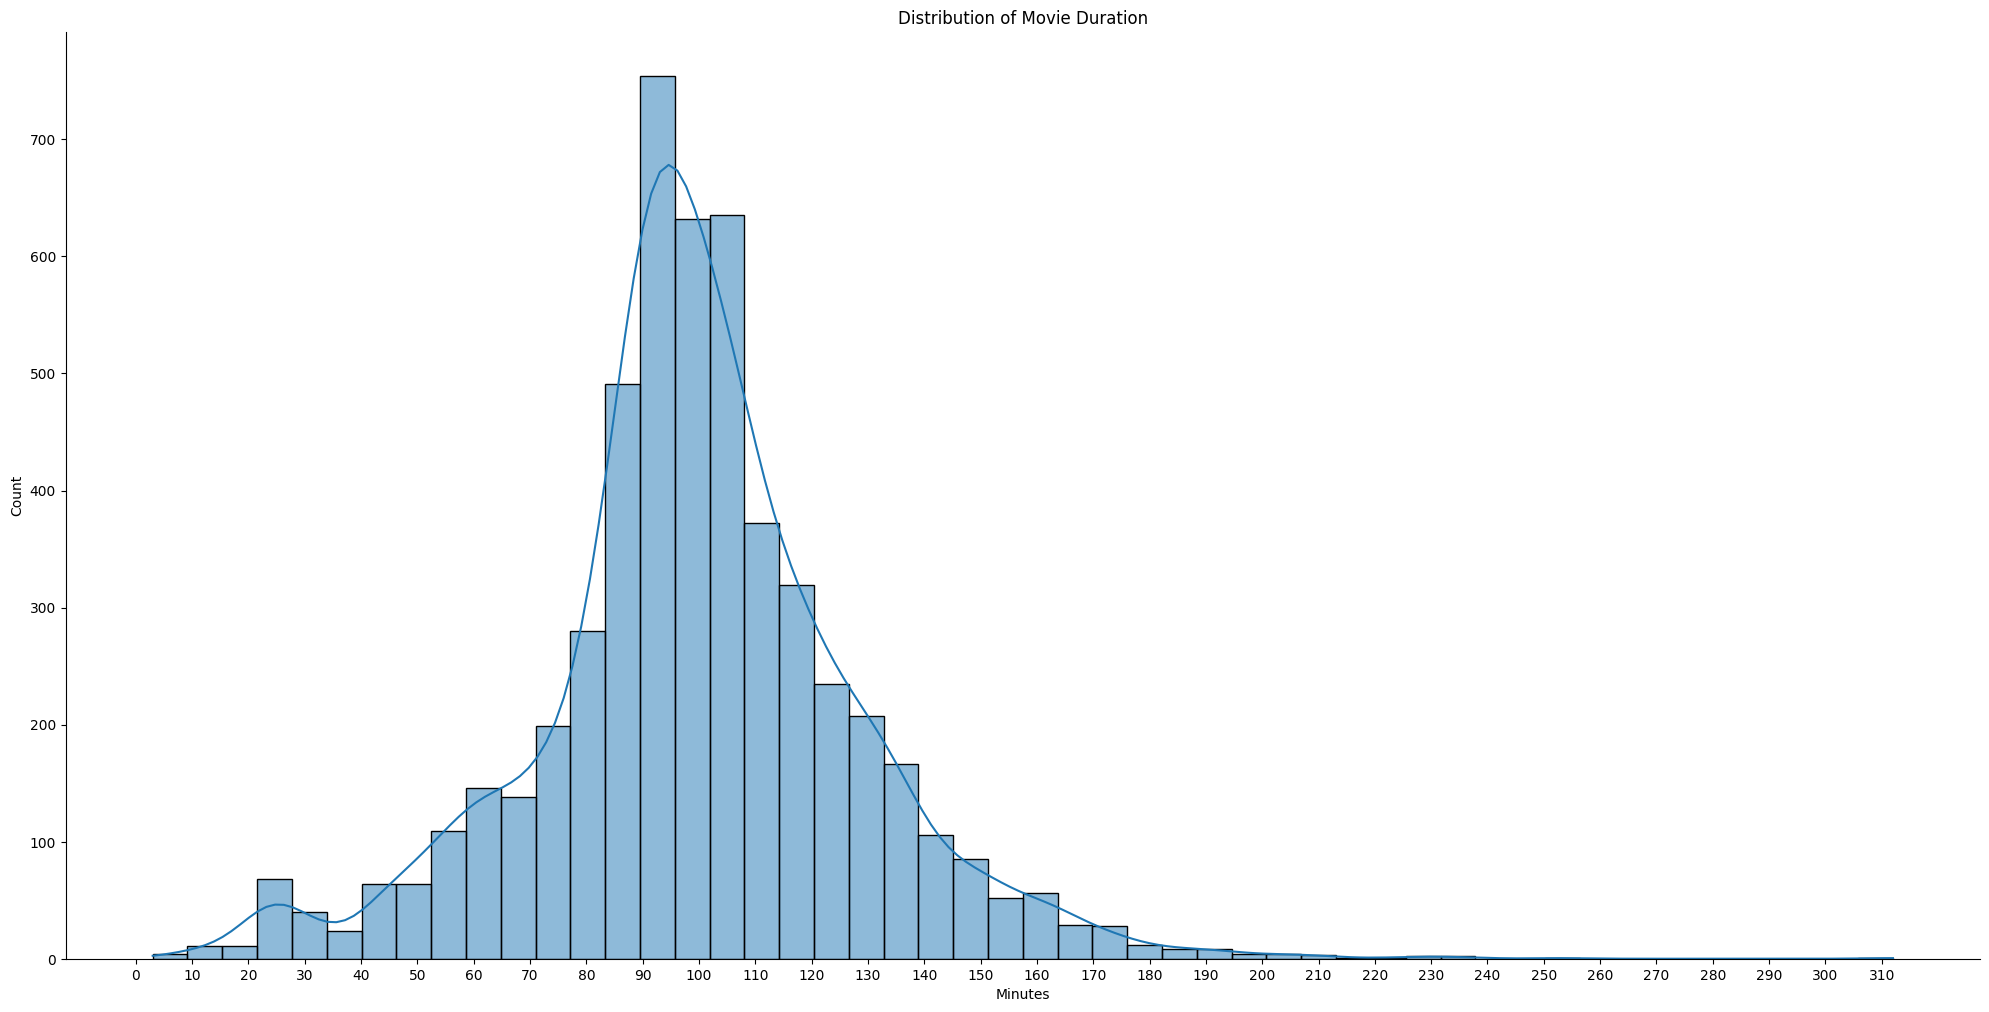

In [30]:
# Duration of Movies
a=df[df['type']=='Movie'].loc[:,['show_id','title','duration']].copy()
duration = (a['duration'].to_list())

duration_list = []
for duration in duration:
  duration_list.append(int(duration.split(' ')[0]))
duration_list = pd.DataFrame({'Duration' : duration_list, 'show_id':np.arange(0,len(duration_list),1)})
plt.figure(figsize=(8,8))
a = sns.displot(x= 'Duration',  data = duration_list, kind = 'hist', height=10, aspect=2, bins = 50,kde=True)
a = plt.title('Distribution of Movie Duration')
a = plt.xlabel('Minutes')
a = plt.xticks(ticks = np.arange(0,duration_list.Duration.max()+1,10))

### 1. Why did you pick the specific chart?
The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature


### 2. What is/are the insight(s) found from the chart?
Most movies on Netflix have a duration range from 80 to 120 minutes

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, it does not have any impact on business.

<AxesSubplot: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

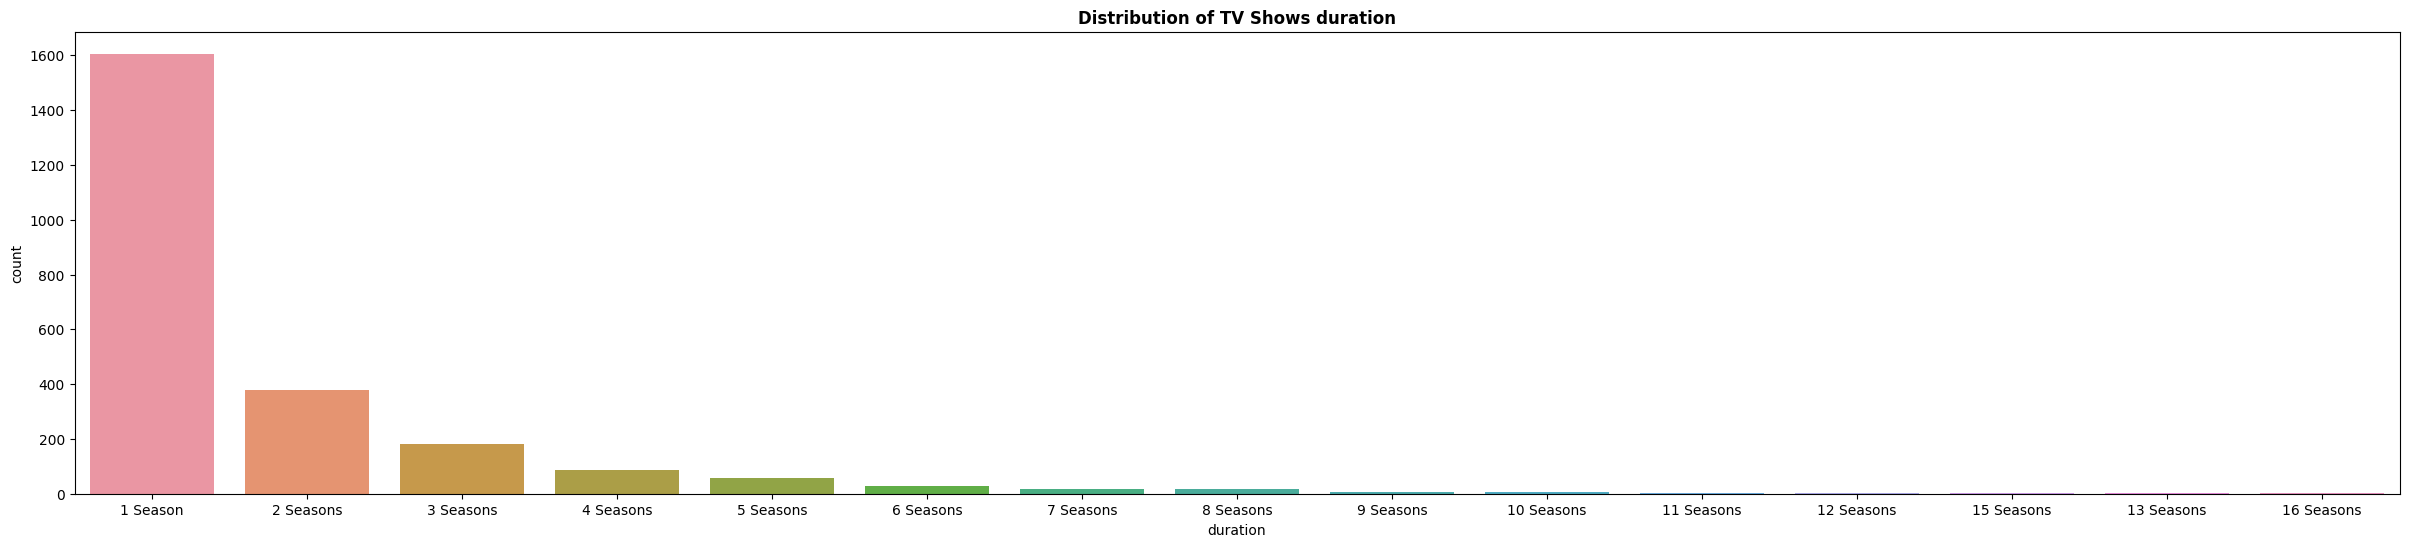

In [31]:
# Duration of TV Shows
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
More number of TV shows are having single season

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, It will not have any impact on business.

# Feature Engineering

## Textual Data Preprocessing

In [32]:
# We will add all categorical and text based columns
df_1 = df.copy()
df_1['text_info'] = df_1['listed_in'] +' '+ df_1['rating'] + ' ' + df_1['description'] + ' ' + df_1['director'] + ' ' + df_1['cast'] + ' ' + df_1['country']

In [33]:
# Checking 
df_1['text_info'][0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy TV-MA In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. unknown João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil'

## Text Cleaning

In [34]:
#We will be using text columns to create clusters for our data.

cluster_df = df[['title']]
df[['description','listed_in','director','cast','country','rating']]=df[['description','listed_in','director','cast','country','rating']].astype(str)
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating'])
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()
bag_of_words = cluster_df.cluster_data

In [35]:
# Removing everything except the alphabets
def clean_text(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))

In [36]:
# Applying above function on our combined column
df_1['text_info'] = df_1['text_info'].apply(clean_text)

In [37]:
# we will convert all words in lowercase
df_1['text_info'] = df_1['text_info'].str.lower()
df_1['text_info'][0]

'international tv shows tv dramas tv scifi  fantasy tvma in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor unknown joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil'

## Tokenization

In [38]:
# Applying Tokenization
def tokenizer(txt):  
  tokens = word_tokenize(txt) 
  return tokens
df_1['Processed Text'] = df_1['text_info'].apply(tokenizer)

print(df_1['Processed Text'][0])

['international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'scifi', 'fantasy', 'tvma', 'in', 'a', 'future', 'where', 'the', 'elite', 'inhabit', 'an', 'island', 'paradise', 'far', 'from', 'the', 'crowded', 'slums', 'you', 'get', 'one', 'chance', 'to', 'join', 'the', 'saved', 'from', 'squalor', 'unknown', 'joo', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zez', 'motta', 'celso', 'frateschi', 'brazil']


## Removing Punctuations

In [39]:
# Applying function to remove Punctuation
regular_punct = list(string.punctuation)
def remove_punctuation(text,punct_list):
  tokens = text
  new_tok = []
  for i in tokens:
    word = i
    for punctuation in list(string.punctuation):
      word = word.replace(punctuation, ' ')
    if word.replace(' ','').isalnum():
      new_tok.append(word)

  return ' '.join(new_tok).split(' ')

df_1['Processed Text'] = df_1['Processed Text'].apply(lambda x : remove_punctuation(x, regular_punct))

## Removing Stopwords

In [40]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')

# Applying function to remove Stop words
stop_words = set(stopwords.words('english')) 

def remove_stop(tokens, stopwords):
  return [t.lower() for t in tokens if t.lower() not in stopwords]

print(df_1['Processed Text'][0])

['international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'scifi', 'fantasy', 'tvma', 'in', 'a', 'future', 'where', 'the', 'elite', 'inhabit', 'an', 'island', 'paradise', 'far', 'from', 'the', 'crowded', 'slums', 'you', 'get', 'one', 'chance', 'to', 'join', 'the', 'saved', 'from', 'squalor', 'unknown', 'joo', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zez', 'motta', 'celso', 'frateschi', 'brazil']


## Lemmatization

In [41]:
# Applying Lemmatization
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stopwords and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [42]:
le = WordNetLemmatizer()

def stem_text(text):  
  lemmatize = []
  for word in text:
    lemmatize.append(word)
  return lemmatize

df_1['Processed Text'] = df_1['Processed Text'].apply(lambda x : stem_text(x))

In [43]:
#join words fun
def join_words(x):
  return " ".join(set(x))

In [44]:
#final column
df_1['Processed Text'] = df_1['Processed Text'].apply(join_words)
df_1['Processed Text']

0       dramas celso scifi the unknown one far mel get...
1       grau dramas devastating stay oscar bichir tvma...
2       lee lawrence forced lai leong henley tedd terr...
3       joins adventure scifi them the machines connel...
4       luketic dramas casinos experts the swindling p...
                              ...                        
7782    zozo dramas civil as means escapes and charbel...
7783    sarahjane musicals dysfunctional dramas malkee...
7784    musicals culture documentary the unknown and s...
7785    skilled rachel australia reality tvpg next ama...
7786    no musicals delves documentary the created and...
Name: Processed Text, Length: 7770, dtype: object

In [45]:
print(df_1['Processed Text'][0])

dramas celso scifi the unknown one far mel get tvma zez miguel paradise chance elite squalor an rodolfo gomes michel inhabit a from lozano comparato join rafael island viviane porto to crowded vaneza shows tv motta future international oliveira bianca sergio in slums joo fantasy mamberti frateschi where brazil valente you saved fronckowiak


## TF-IDF

In [46]:
# defining a variable to our dependent variable
words = df_1['Processed Text']

tfidf = TfidfVectorizer(max_features = 5000)    
X = tfidf.fit_transform(words)

# convert X into array form for clustering
X = X.toarray()

X.shape

(7770, 5000)

# PCA

In [47]:
# DImensionality Reduction
pca = PCA()
pca.fit(X)

PCA()

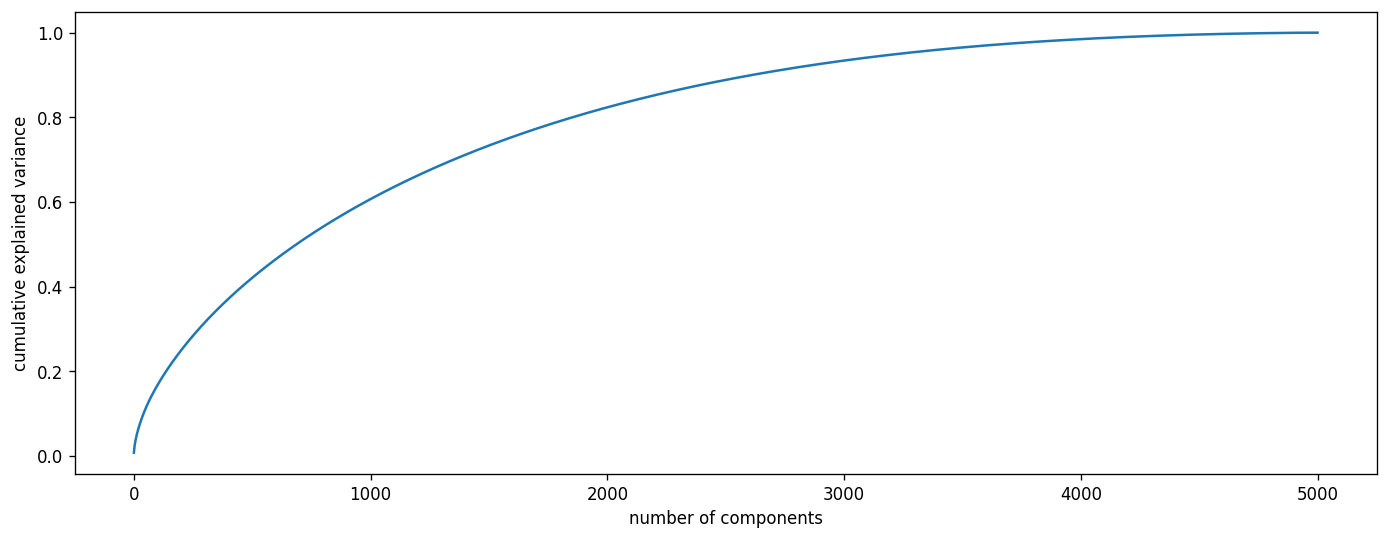

In [48]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We can see from the above plot almost 95% of the variance can be explained by 5000 components.

In [49]:
# after trying varius value of n_components I fount 0.05 is best value
pca_tuned = PCA(n_components=0.05)
pca_tuned.fit(X)
X = pca_tuned.transform(X)
X.shape

(7770, 13)

I used Principal Component Analysis(PCA),PCA is a technique used to reduce the dimensionality of a dataset while retaining as much information as possible. It is often used to simplify data visualization and to identify patterns or relationships in the data

# ML Model

## K-Means Clustering

In [50]:
# standardising the data
scaler=MinMaxScaler()
X=scaler.fit_transform(X) 

In [51]:
silhouette_score_ = [ ]
sum_of_sq_dist = {}
range_n_clusters = [i for i in range(2,20)]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10,random_state=40)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    sum_of_sq_dist[n_clusters] = clusterer.inertia_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])

### Elbow method to find optimum k value

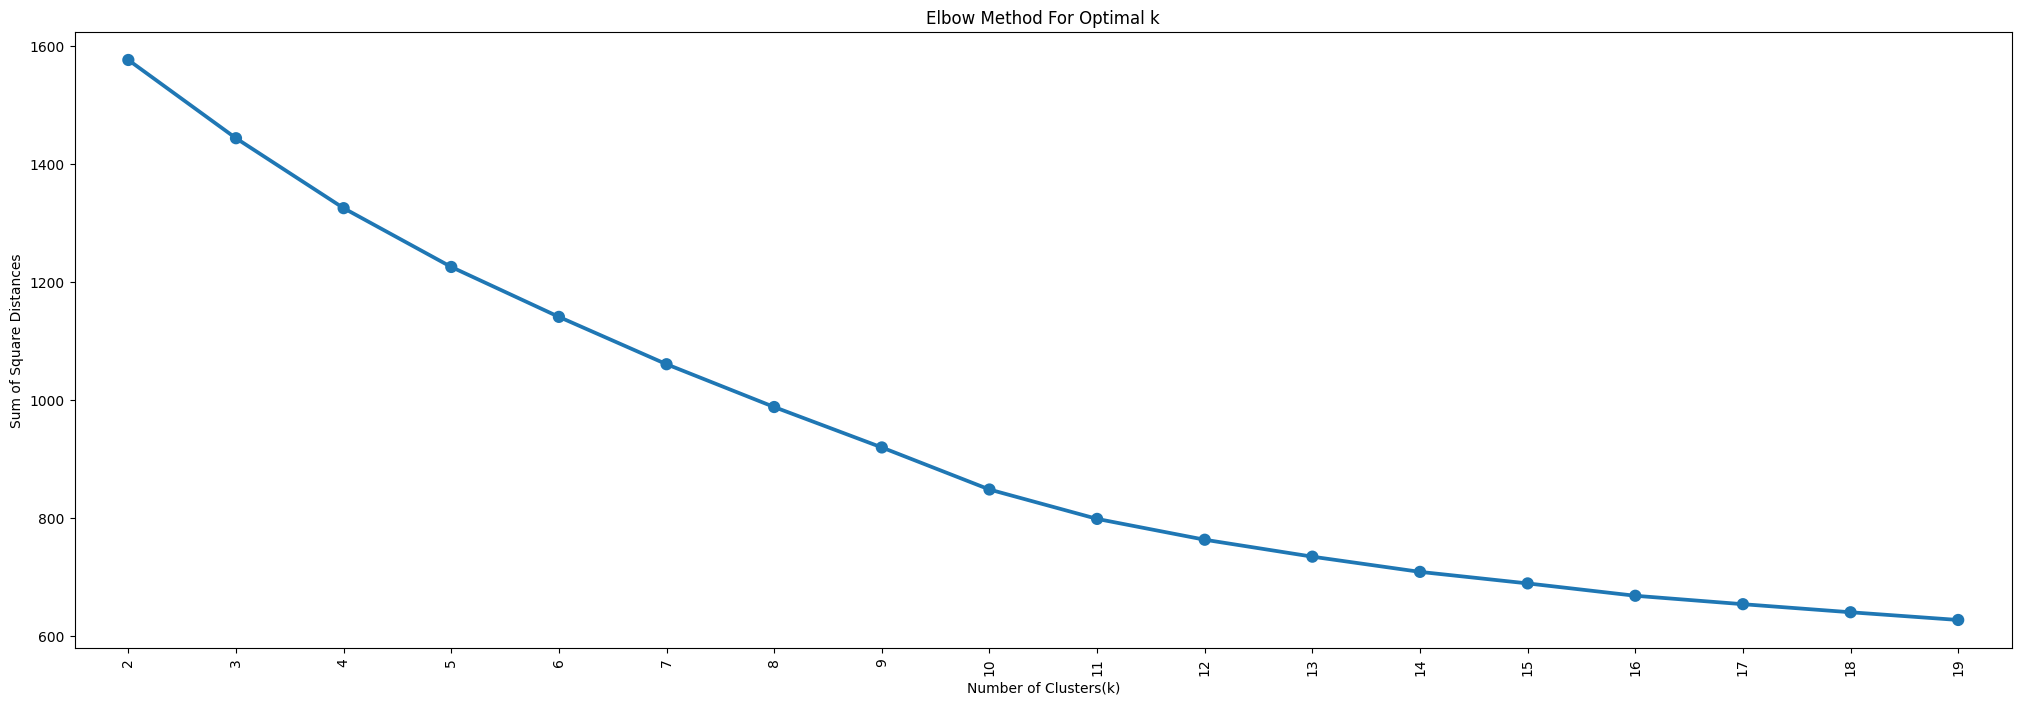

In [52]:
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(25,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.xticks(rotation = 90)
plt.show()

### Clusters vs Silhouette score

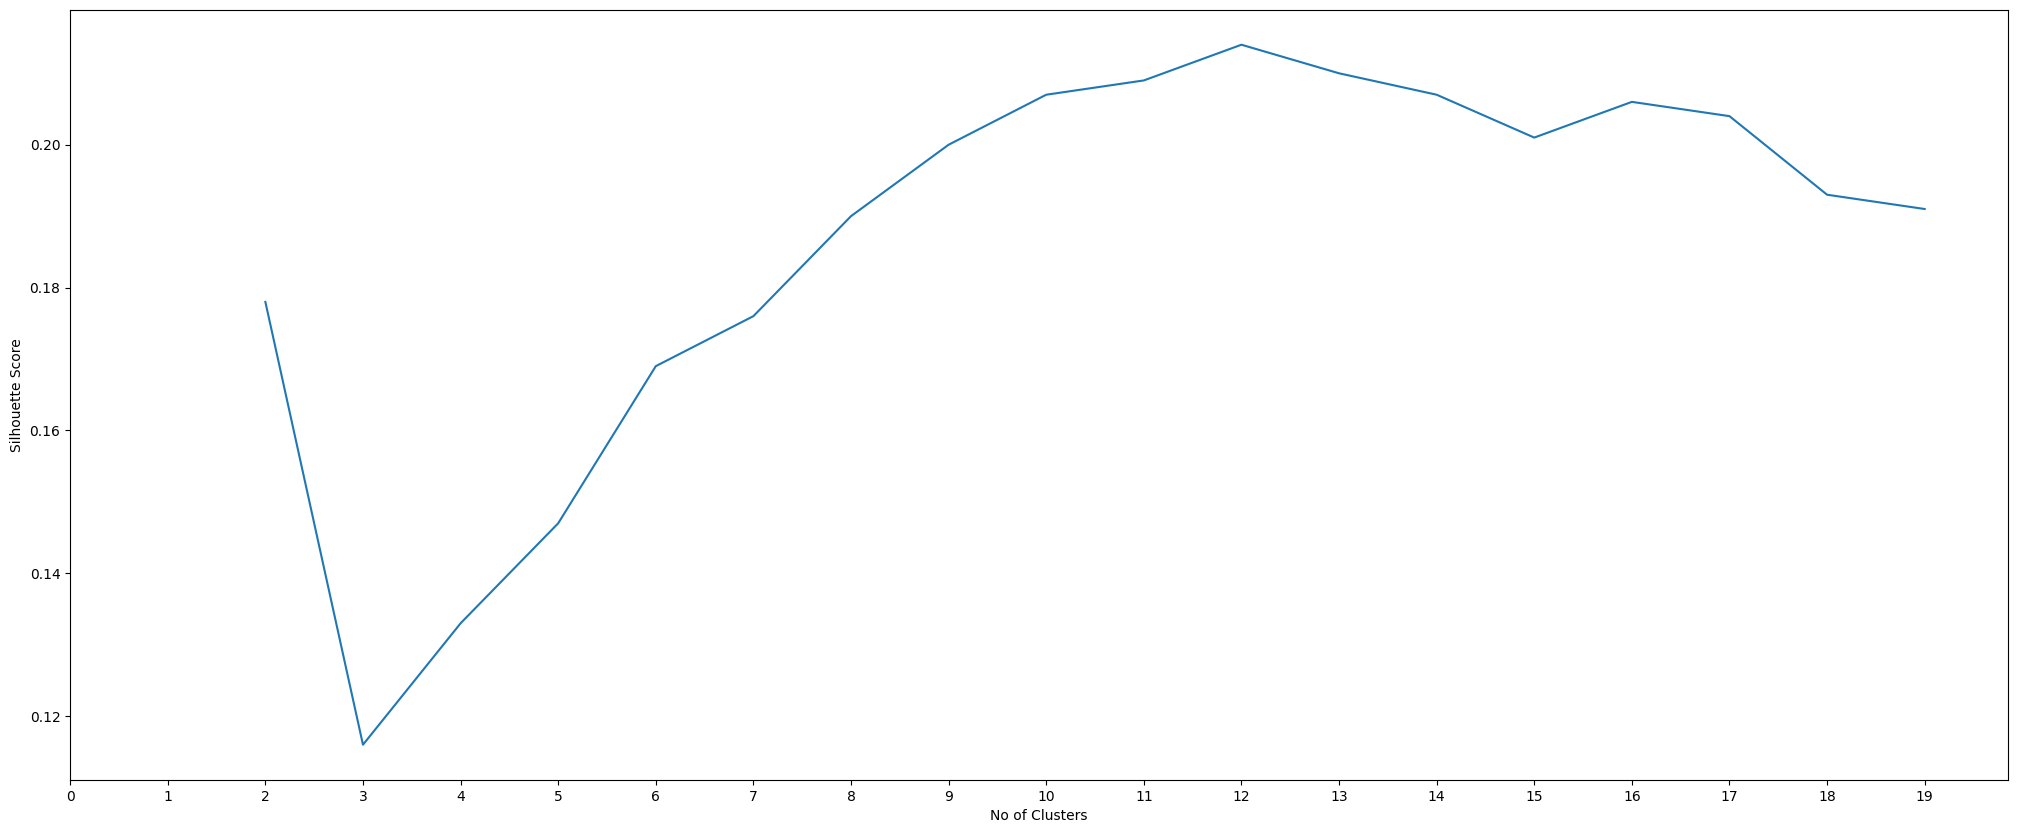

In [53]:
Kmeans = pd.DataFrame(silhouette_score_ , columns = ["No of Clusters" , "Silhouette Score"])
plt.figure(figsize=(25,10))
_ = sns.lineplot(x = Kmeans['No of Clusters'], y = Kmeans['Silhouette Score'])
_ = plt.xticks(ticks = np.arange(0,20,1))

In [54]:
Kmeans.sort_values(['Silhouette Score','No of Clusters'],ascending=False)

No of Clusters  Silhouette Score
10              12             0.214
11              13             0.210
9               11             0.209
12              14             0.207
8               10             0.207
14              16             0.206
15              17             0.204
13              15             0.201
7                9             0.200
16              18             0.193
17              19             0.191
6                8             0.190
0                2             0.178
5                7             0.176
4                6             0.169
3                5             0.147
2                4             0.133
1                3             0.116

#### We have used Silhoutte Score to find optimal number of clusters. From Silhouette Analysis and Elbow method, the optimal cluster is 13. This gives a clustering score of 0.214

## Perform Clustering considering k=12

In [55]:
#fitting model
kmeans = KMeans(n_clusters=12)
kmeans.fit(X)

KMeans(n_clusters=12)

In [56]:
df['label'] = kmeans.labels_

### VISUALIZATION for K = 12 clusters

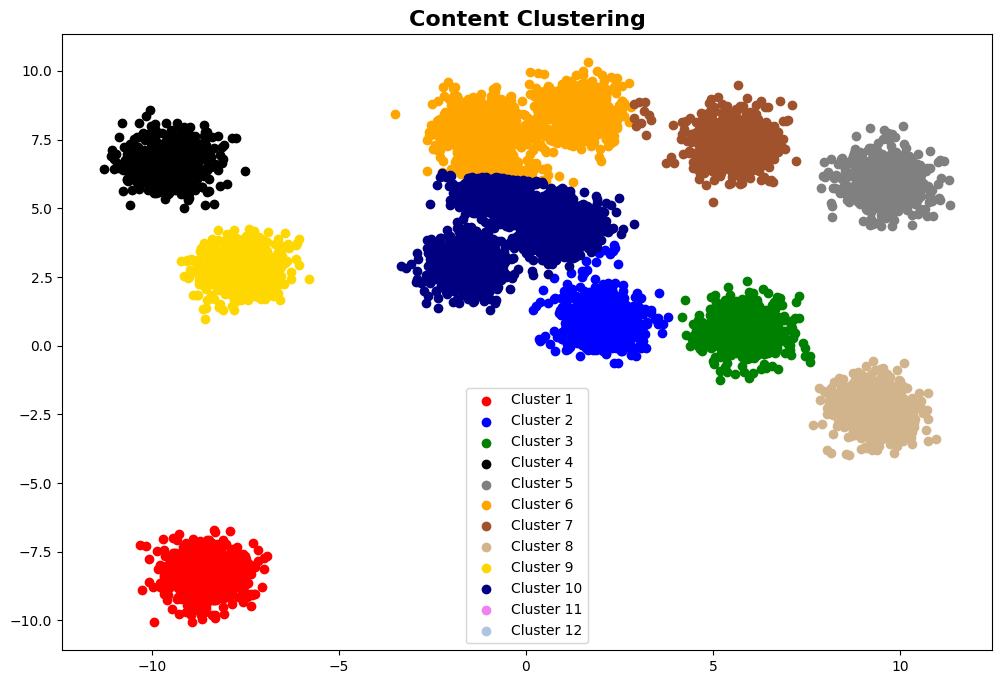

In [57]:
plt.figure(figsize=(12,8), dpi=100)
X, y_true = make_blobs(n_samples=7770, centers=13,
                       cluster_std=0.6, random_state=0)
kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=0)
kmeans.fit(X)

#predict the labels of clusters.
pred = kmeans.fit_predict(X)
#Getting unique labels
unique_labels = np.unique(pred)
 
#plotting the results:
# plot the cluster points
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c='red', label='Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c='blue', label='Cluster 2')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c='green', label='Cluster 3')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c='black', label='Cluster 4')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c='gray', label='Cluster 5')
plt.scatter(X[pred == 5, 0], X[pred == 5, 1], c='orange', label='Cluster 6')
plt.scatter(X[pred == 6, 0], X[pred == 6, 1], c='sienna', label='Cluster 7')
plt.scatter(X[pred == 7, 0], X[pred == 7, 1], c='tan', label='Cluster 8')
plt.scatter(X[pred == 8, 0], X[pred == 8, 1], c='gold', label='Cluster 9')
plt.scatter(X[pred == 9, 0], X[pred == 9, 1], c='navy', label='Cluster 10')
plt.scatter(X[pred == 10, 0], X[pred == 10, 1], c='violet', label='Cluster 11')
plt.scatter(X[pred == 11, 0], X[pred == 11, 1], c='lightsteelblue', label='Cluster 12')
# plt.scatter(X[pred == 12, 0], X[pred == 12, 1], c='cyan', label='Cluster 13')
plt.legend()
plt.title('Content Clustering',fontsize = 16, fontweight='bold')
plt.show()

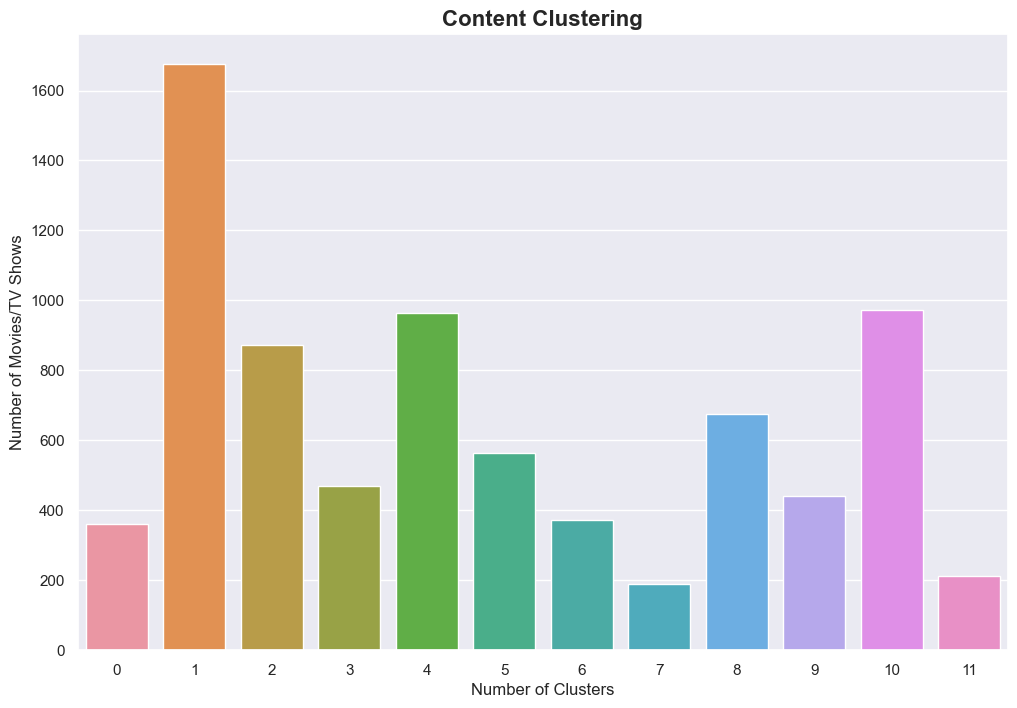

In [58]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("Set1")
ax = sns.countplot(x='label', data = df)
ax.set_title('Content Clustering',fontsize = 16, fontweight='bold')

ax.set_ylabel('Number of Movies/TV Shows',fontsize = 12)
ax.set_xlabel('Number of Clusters',fontsize = 12)
plt.show()

## Hierarchial Clustering

In [59]:
hier_ward_euc = sch.linkage(X, method = 'ward', metric = 'euclidean')

### Dendrogram

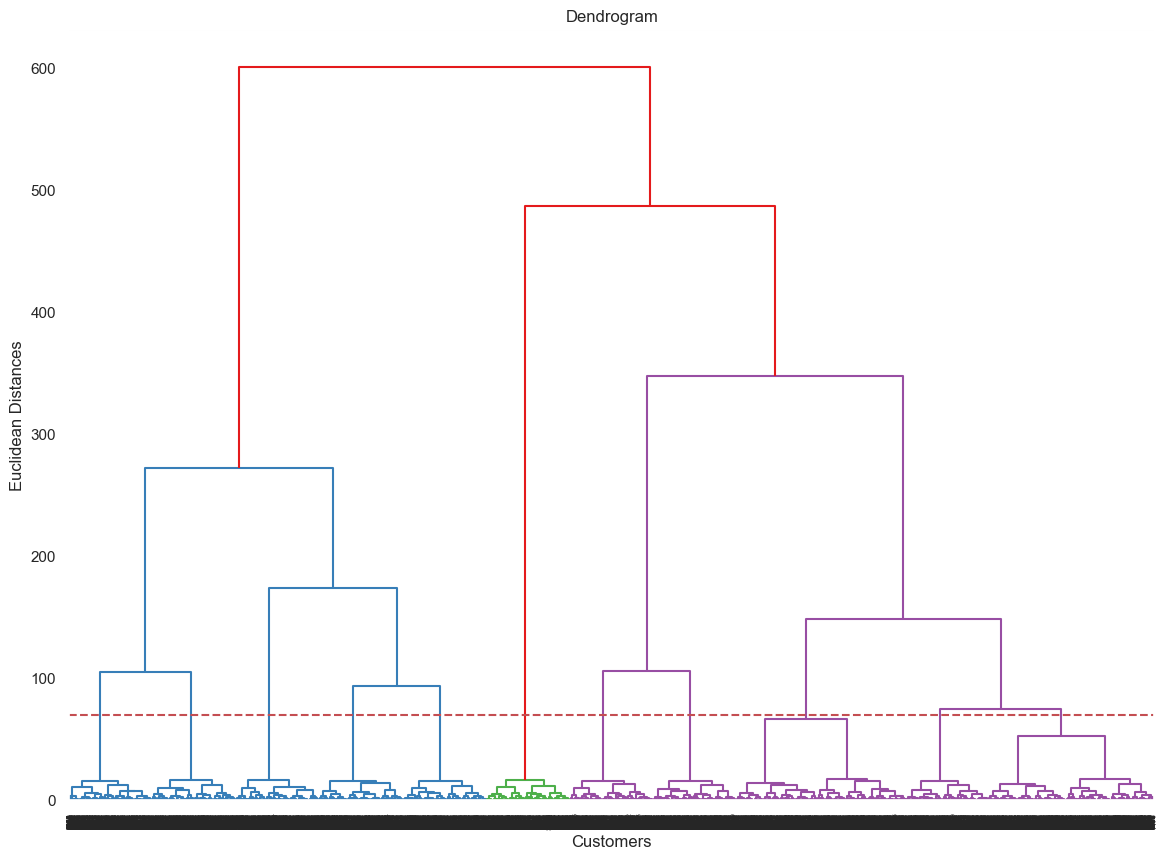

In [60]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=70, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

### Clusters and Silhoutte Scores

In [61]:
#Silhouette Score Ploting the cluster points
sample_silhouette_values=[]


for clusters in range(7,15):
    # perform hierarchical  clustering with the optimal number of clusters
    hierarchical = AgglomerativeClustering(n_clusters=clusters)
    hierarchical.fit(X)
    pred = hierarchical.fit_predict(X)
    
    sample_silhouette_values.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(clusters, score))

For n_clusters = 7, silhouette score is 0.1914971284481772
For n_clusters = 8, silhouette score is 0.1914971284481772
For n_clusters = 9, silhouette score is 0.1914971284481772
For n_clusters = 10, silhouette score is 0.1914971284481772
For n_clusters = 11, silhouette score is 0.1914971284481772
For n_clusters = 12, silhouette score is 0.1914971284481772
For n_clusters = 13, silhouette score is 0.1914971284481772
For n_clusters = 14, silhouette score is 0.1914971284481772


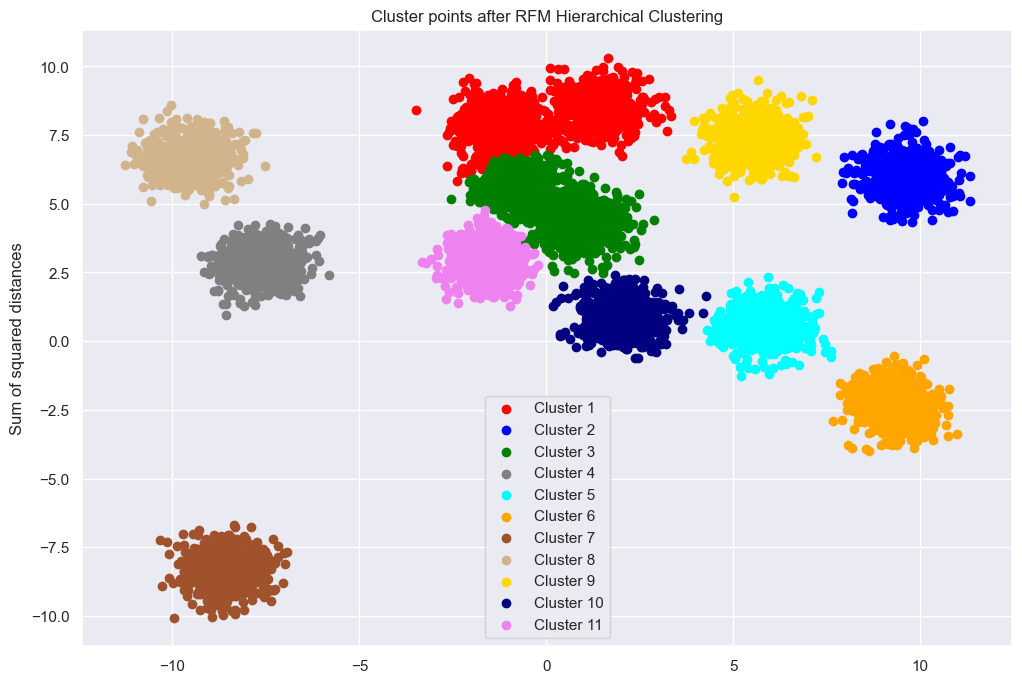

In [62]:
hierarchical = AgglomerativeClustering(n_clusters=11)
hierarchical.fit(X)
pred = hierarchical.fit_predict(X)

sample_silhouette_values=[]    
sample_silhouette_values.append(score)
# print("For n_clusters = {}, silhouette score is {}".format(clusters, score))

# plot the cluster points
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c='red', label='Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c='blue', label='Cluster 2')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c='green', label='Cluster 3')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c='gray', label='Cluster 4')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c='cyan', label='Cluster 5')
plt.scatter(X[pred == 5, 0], X[pred == 5, 1], c='orange', label='Cluster 6')
plt.scatter(X[pred == 6, 0], X[pred == 6, 1], c='sienna', label='Cluster 7')
plt.scatter(X[pred == 7, 0], X[pred == 7, 1], c='tan', label='Cluster 8')
plt.scatter(X[pred == 8, 0], X[pred == 8, 1], c='gold', label='Cluster 9')
plt.scatter(X[pred == 9, 0], X[pred == 9, 1], c='navy', label='Cluster 10')
plt.scatter(X[pred == 10, 0], X[pred == 10, 1], c='violet', label='Cluster 11')

plt.title('Cluster points after RFM Hierarchical Clustering')
plt.ylabel('Sum of squared distances')
plt.legend()
plt.show()

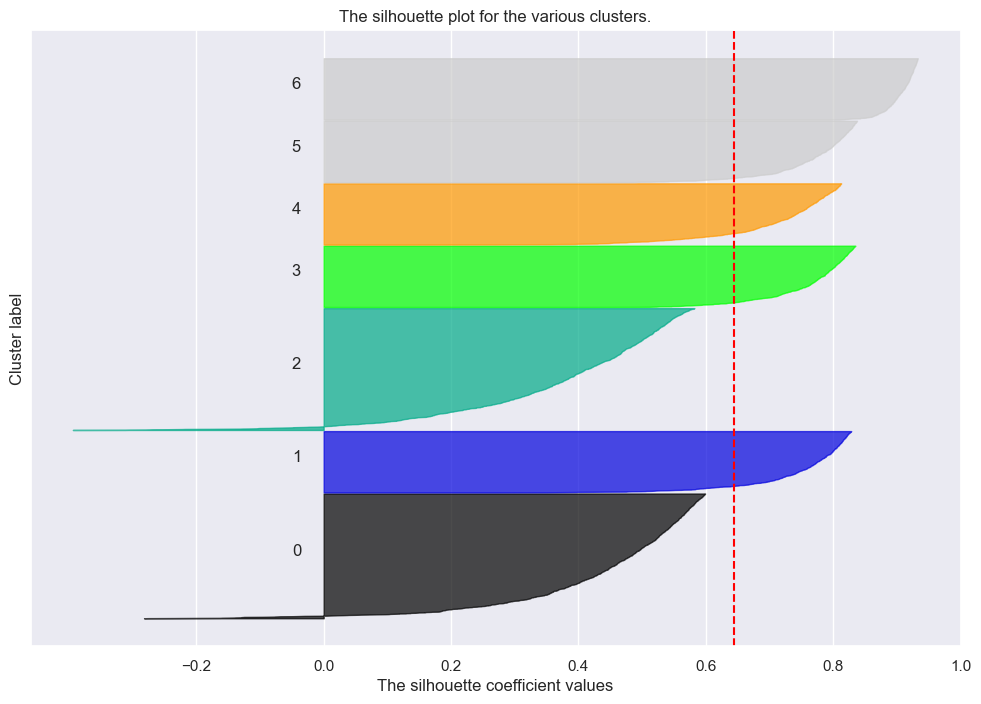

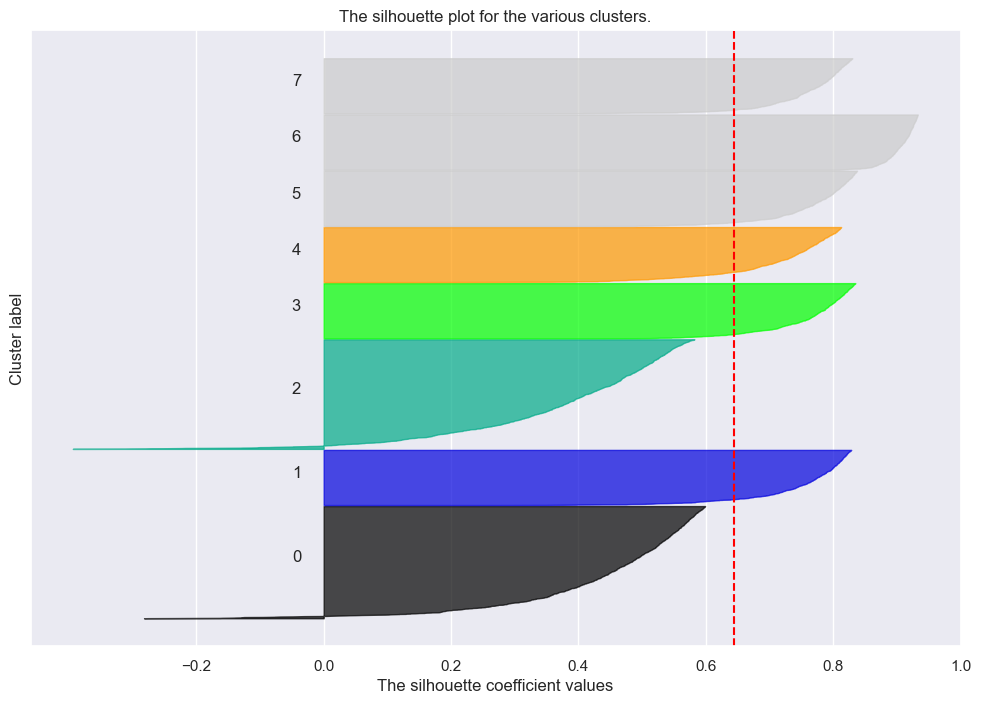

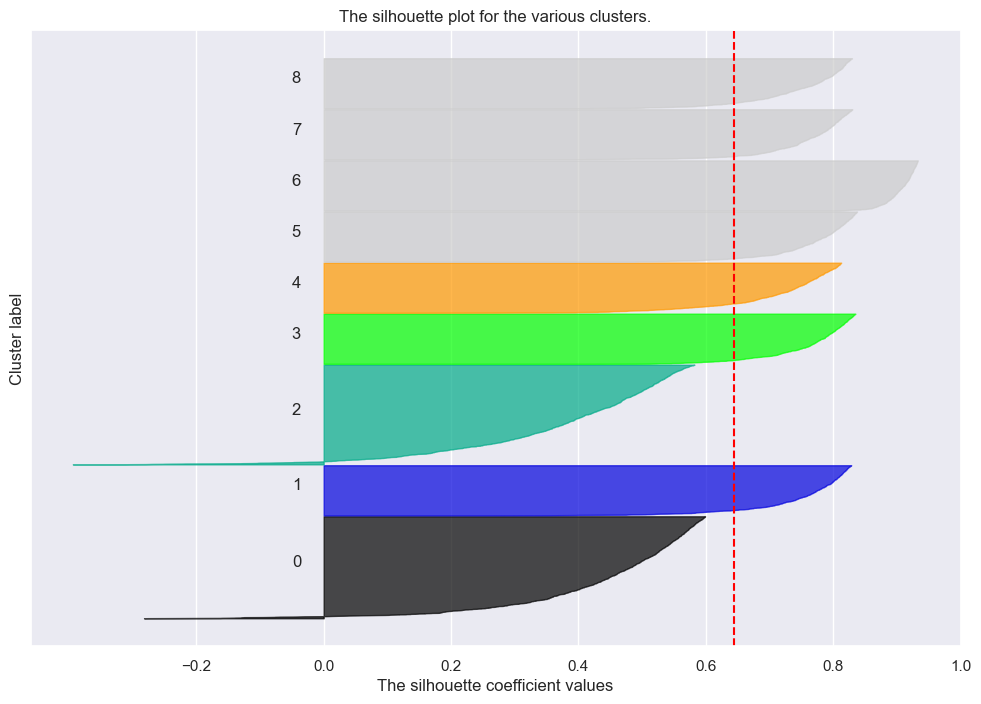

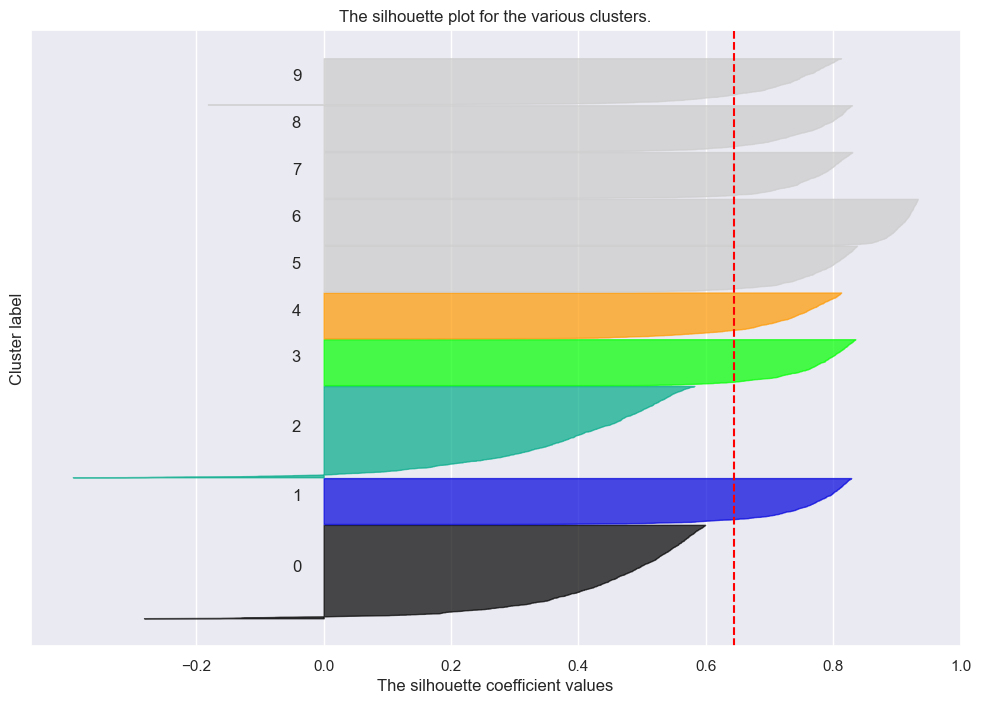

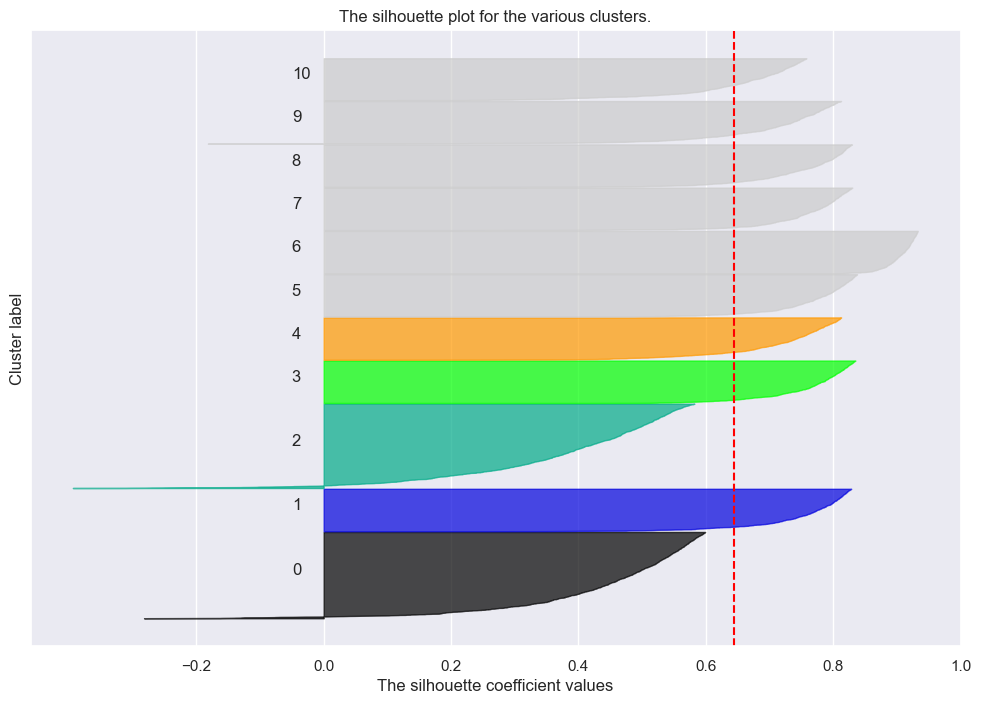

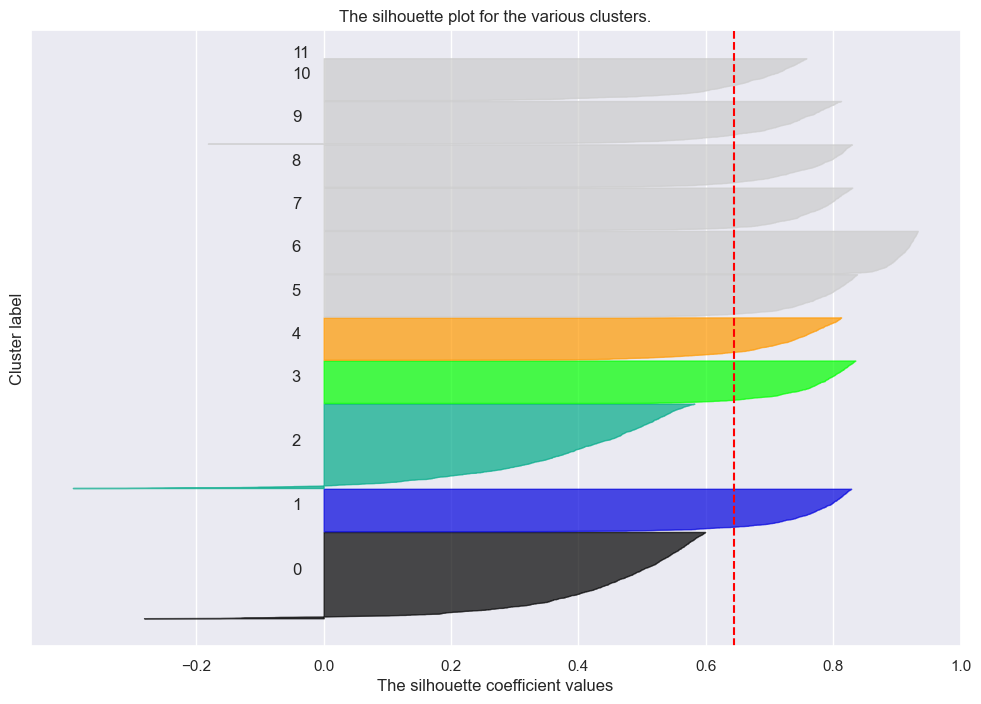

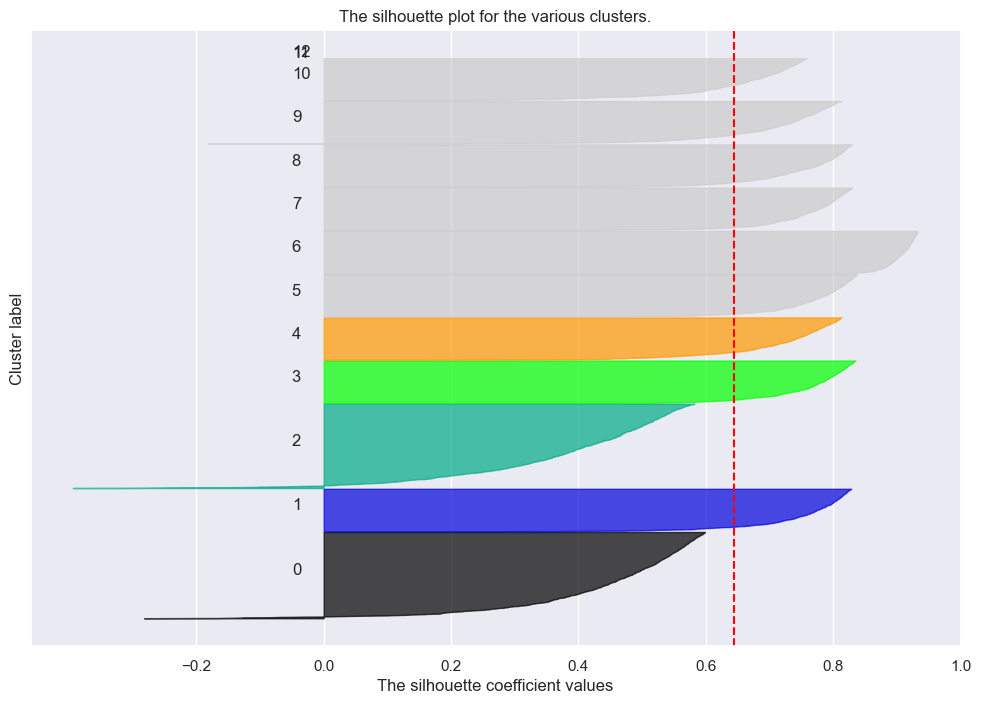

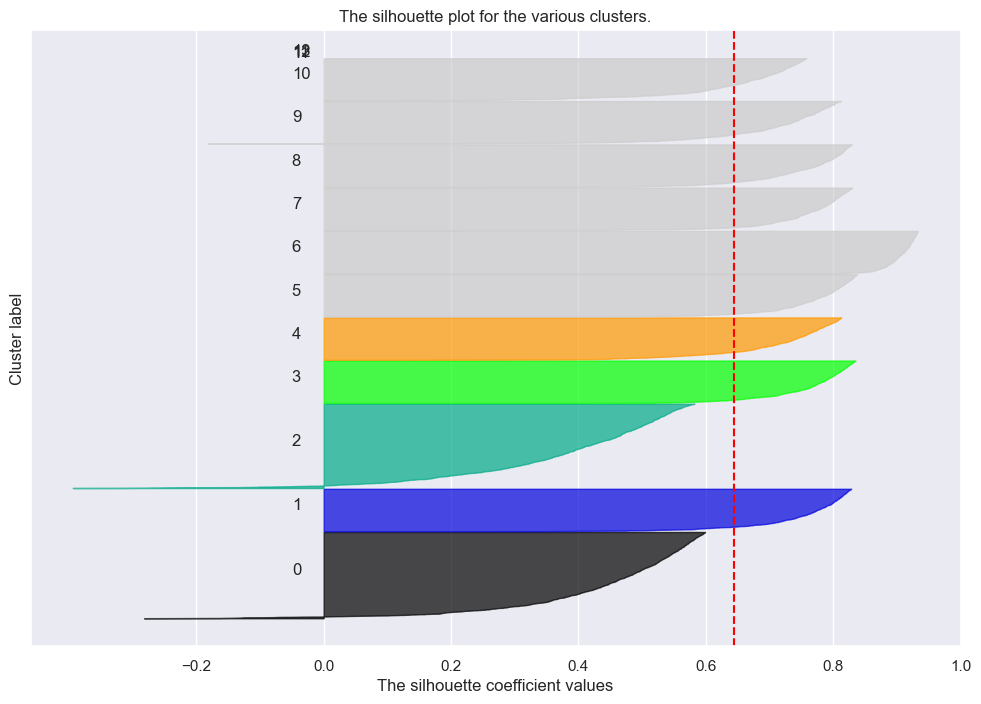

In [63]:
#Silhouette Score visualizer 
y_lower = 10
for clusters in range(7,15):
    for i in range(clusters):
        sample_silhouette_values = silhouette_samples(X, pred)
        silhouette_avg = silhouette_score(X, pred)
        ith_cluster_silhouette_values = sample_silhouette_values[pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / 5)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])
    plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

#### Based on the silhouette score, it appears that the optimal number of clusters is 11, as it has the highest silhouette score compared to other cluster numbers.

#### A silhouette score of 0.191 is considered moderate, which means that the clusters are well separated.

# WORD CLOUD

In [64]:
#word cloud for all content
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['label',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['label']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

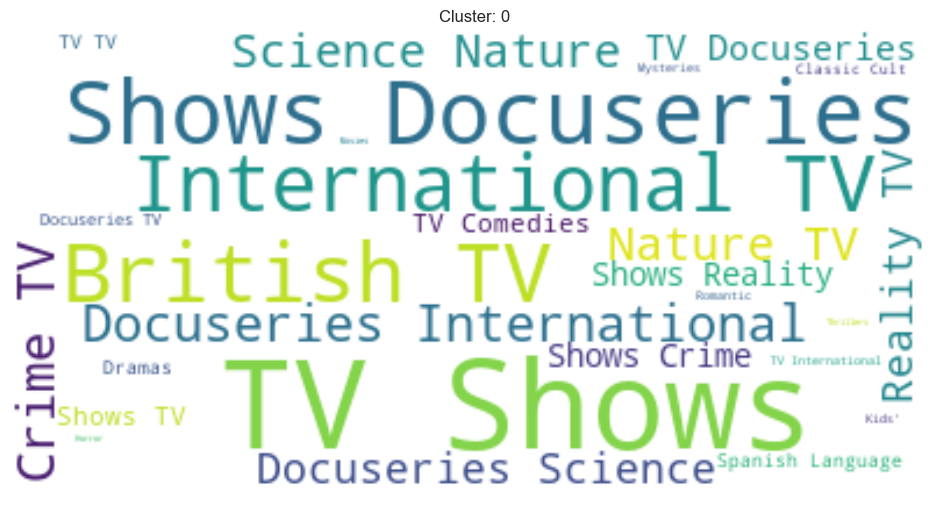

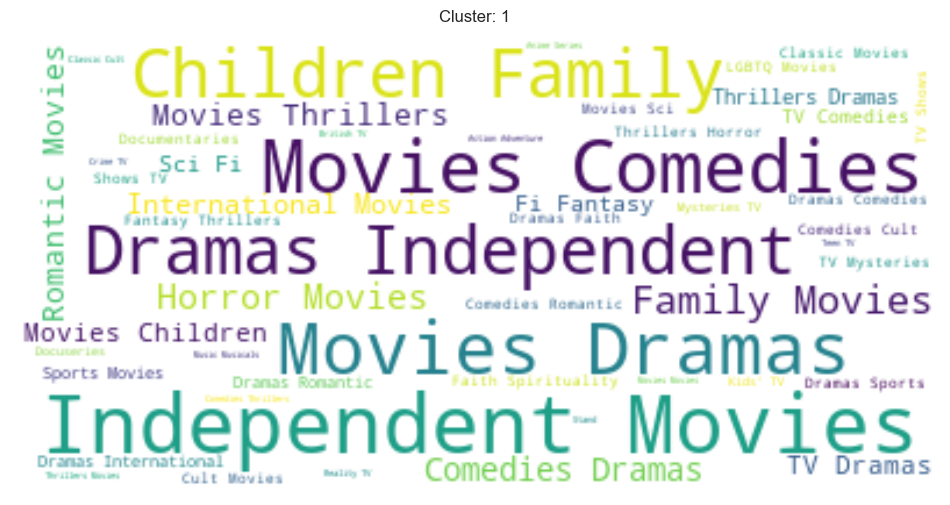

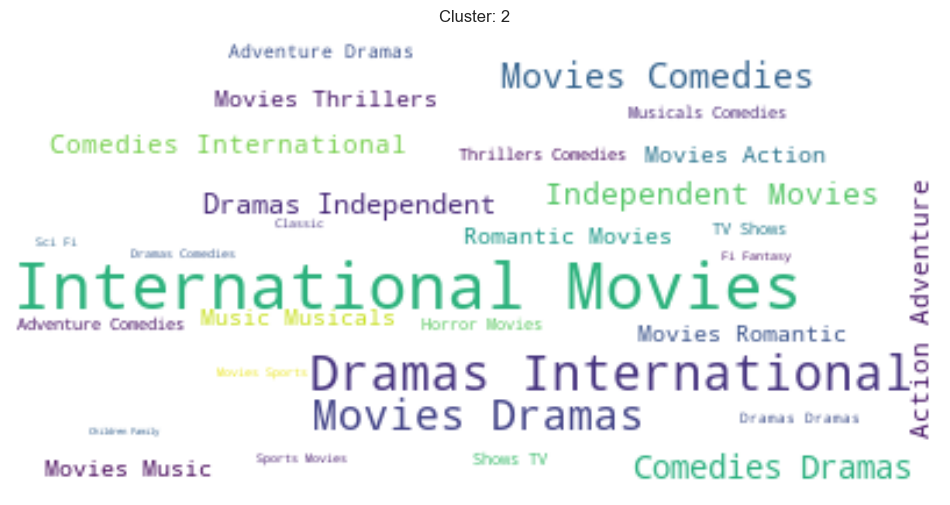

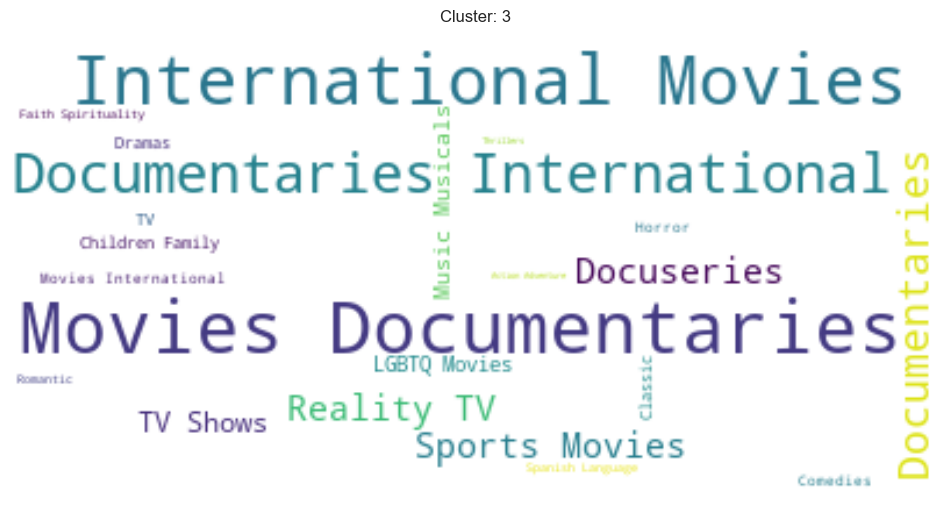

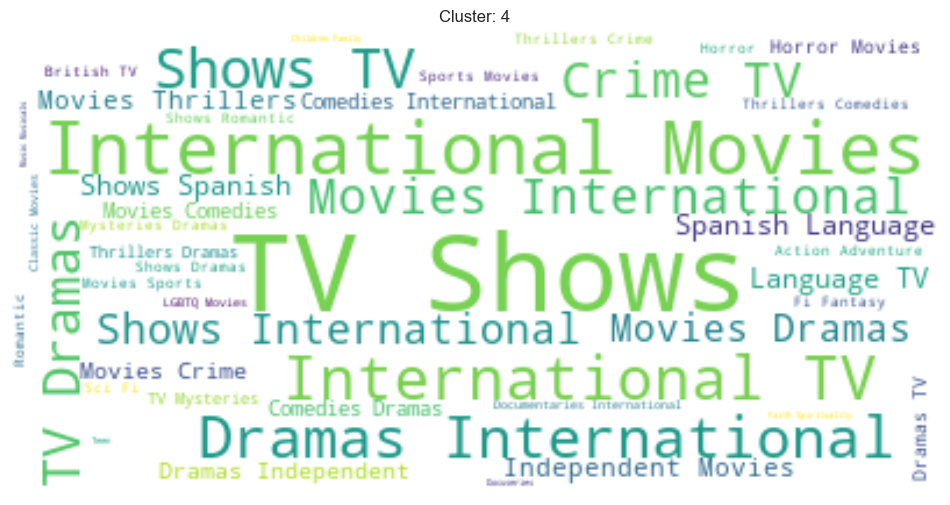

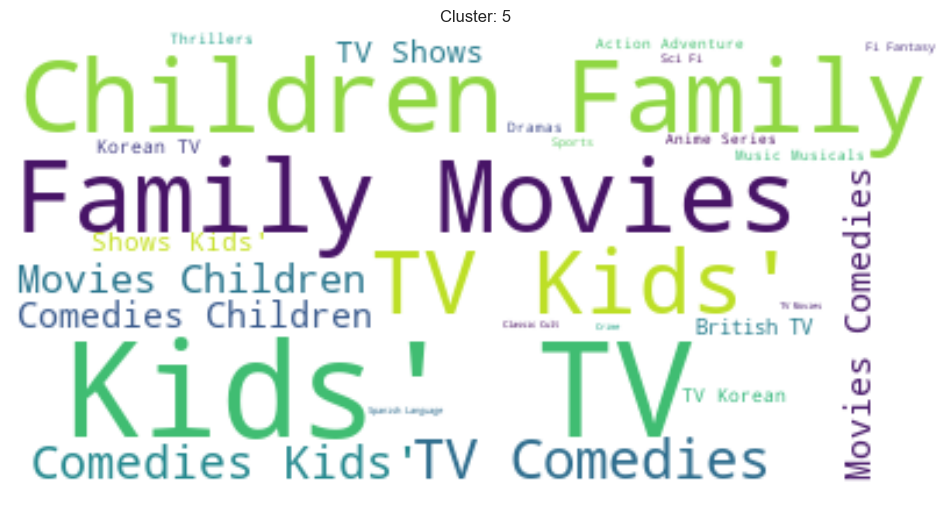

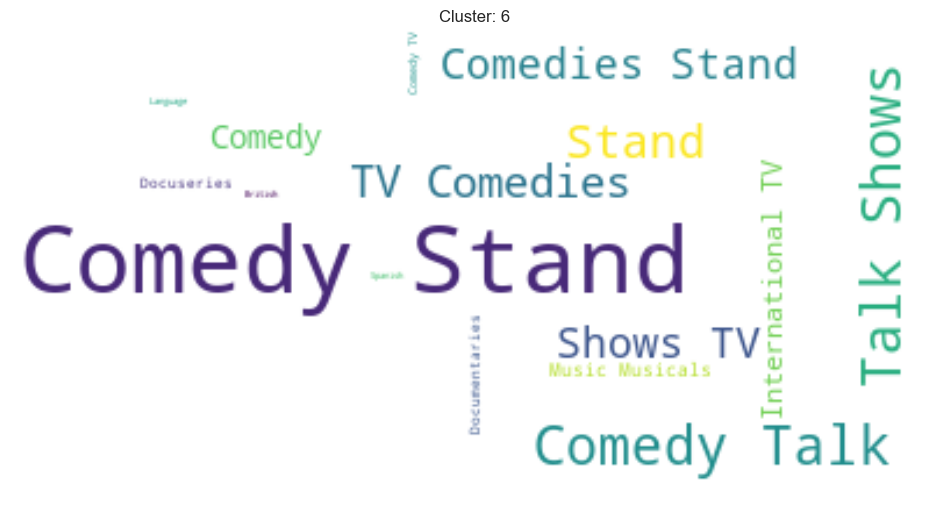

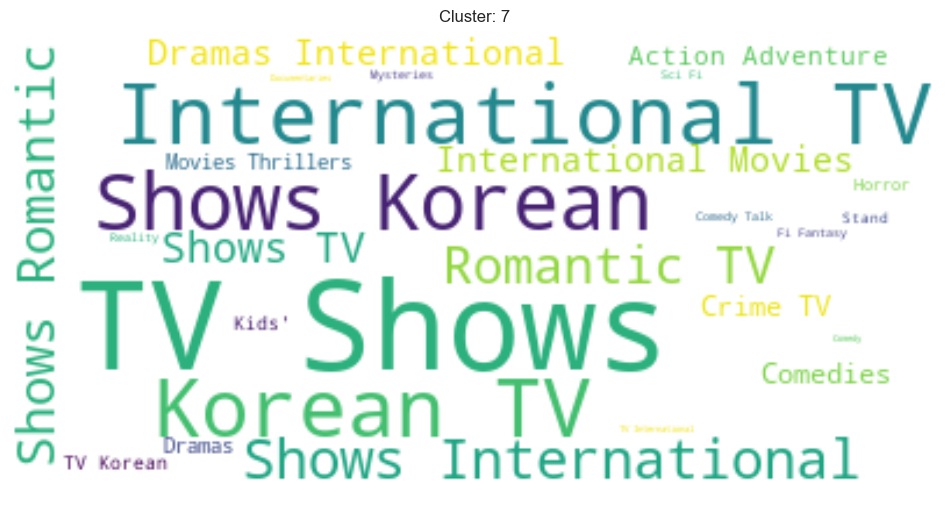

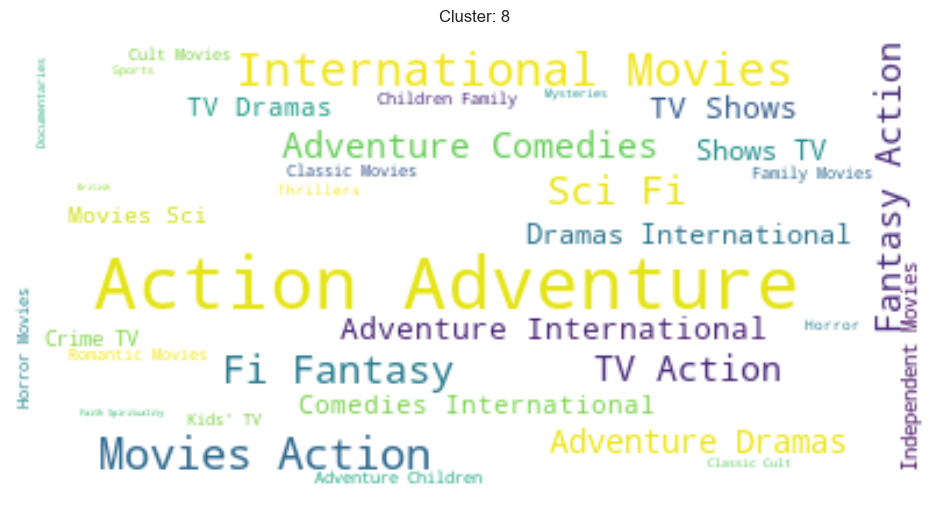

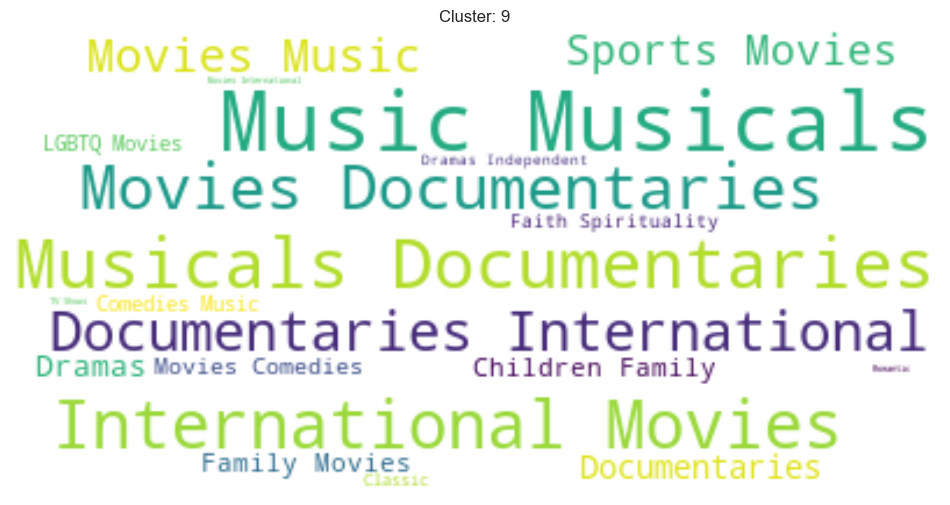

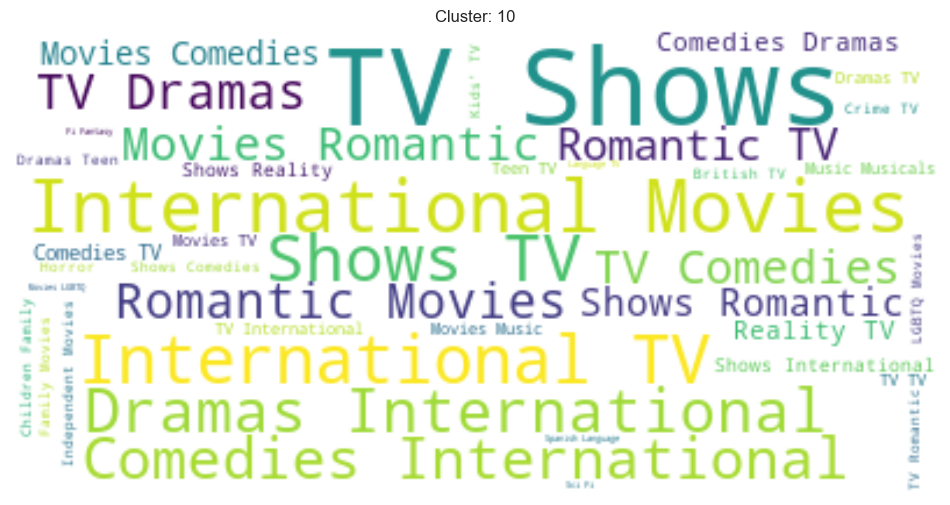

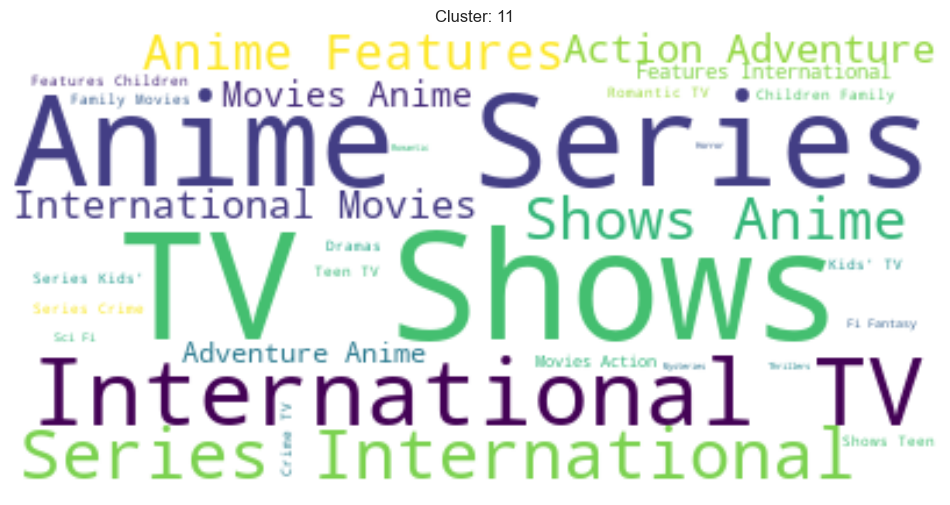

In [65]:
for i in range(12):
  func_select_Category(i,'listed_in')

# Recommendations

In [66]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
# TFIDF
t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bag_of_words)

In [68]:
# cosine similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.06278194, 0.02325691, ..., 0.02458767, 0.02164089,
        0.02054592],
       [0.06278194, 1.        , 0.00775539, ..., 0.06297463, 0.00438288,
        0.00427666],
       [0.02325691, 0.00775539, 1.        , ..., 0.00879237, 0.00857019,
        0.00645431],
       ...,
       [0.02458767, 0.06297463, 0.00879237, ..., 1.        , 0.02306339,
        0.11644512],
       [0.02164089, 0.00438288, 0.00857019, ..., 0.02306339, 1.        ,
        0.01620132],
       [0.02054592, 0.00427666, 0.00645431, ..., 0.11644512, 0.01620132,
        1.        ]])

In [69]:
indices = pd.Series(cluster_df.index)
indices[:5]

0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

In [70]:

# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_df.index)[i])
        
    return recommended_movies

In [71]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('Aalorukkam'), columns=['Recommendations'])
movie_recommendations.head(11)

Recommendations
0                             History of Joy
1                                       Rukh
2                   ABCD: Any Body Can Dance
3                                     Pulang
4                            I'm Leaving Now
5                                     Aadu 2
6                                     Kanika
7  John Leguizamo's Latin History for Morons
8                                     Paathi
9                              Gimme Shelter

In [72]:
# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('I AM A KILLER'), columns=['Recommendations'])
tvshows_recommendations.head(11)

Recommendations
0                Women Behind Bars
1             The Confession Tapes
2          I AM A KILLER: RELEASED
3   Killer Women with Piers Morgan
4             Encounters with Evil
5            The Murder Detectives
6  Serial Killer with Piers Morgan
7                  Shadow of Truth
8        How to Fix a Drug Scandal
9               Surviving R. Kelly

In [73]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('War'), columns=['Recommendations'])
movie_recommendations.head(11)

Recommendations
0            Ninja Assassin
1  I'll Sleep When I'm Dead
2     The Forbidden Kingdom
3        Chasing the Dragon
4          A Man Called God
5                  Magnolia
6        The Age of Shadows
7                Gridlocked
8                   Tinker'
9      Five Elements Ninjas

In [74]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('Avengers: Infinity War'), columns=['Recommendations'])
movie_recommendations.head(11)

Recommendations
0                            Thor: Ragnarok
1                             Black Panther
2          Mark Gatiss: A Study in Sherlock
3                                       Her
4                                 War Horse
5                         The Little Prince
6    Star Wars: Episode VIII: The Last Jedi
7         Penguins of Madagascar: The Movie
8                                    Zodiac
9  Cirque du Freak: The Vampire's Assistant

### 1. Which Evaluation metrics did you consider for a positive business impact and why ?

Silhouette Score measures the similarity between an observation and its own cluster compared to other clusters.

A positive business impact of using the Silhouette Score is that it provides a quantitative measure of the quality of the clustering solution. By using the Silhouette Score, the clustering results can be objectively evaluated and compared to other clustering algorithms or solutions. The score ranges from -1 to 1, with a score closer to 1 indicating a better clustering solution.

Additionally, the Silhouette Score helps identify the optimal number of clusters by providing a measure of the cohesion within each cluster and the separation between different clusters. This information can be used to make informed decisions about the number of clusters to use for the final solution.

Overall, the Silhouette Score is considered for a positive business impact as it provides a reliable and objective measure of the quality of the clustering solution, which can lead to improved recommendations for Netflix users and ultimately, increase customer satisfaction and engagement.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Silhouette Score is a measure of how well each sample is classified within its own cluster compared to other clusters. A high Silhouette Score indicates that the samples are well separated and well defined within their own clusters.

A Silhouette Score of 0.214 for the kmeans algorithm indicates that the model has produced clusters with relatively good separation and definition. This is important for the Netflix Movies and TV Shows Clustering task, as the goal is to group similar movies and TV shows together in a way that makes sense and is easy to understand for the user.

Therefore, the kmeans model with a Silhouette Score of 0.214 is chosen as the final prediction model, as it provides a good balance between accuracy and interpretability. Additionally, kmeans is a simple and well-understood algorithm that is easy to implement and interpret, making it a good choice for this task.

# Conclusion

* **It was interesting to find that majority of the content available on Netflix is Movies but in the recent years it has been focusing more on Tv-Shows.**
* **The number of movies on Netflix is growing significantly faster than the number of TV shows.** 
* **We saw a huge increase in the number of movies and TV Shows after 2015.  Highest number of movies released in 2017.** 
* **Less Number of movies released after 2017 whereas more number of TV shows were released in this period.**
* **Most of these contents are released either in the year ending or in the beginning.**
* **International Movies/TV Shows are the top most genre in netflix which is fllowed by Drama and Comedy movies/TV shows.**
* **United States is the major content producing country on the platform followed by India, UK, Japan, South Korea.**
* **Jan Sulter and Raul Campos have directed the most content on Netflix.**
* **Also 6 of the actors among the top ten actors with maximum content are from India. Anupam Kher, Shah Rukh Khan, Om Puri are top 3 Actors.**
* **TV-MA tops the rating chart, indicating that mature content is more popular on Netflix.**
* **Most of the movies have duration between 80 to 120 minutes.**
* **Most number of TV shows are having single season. Grey's Anatomy is the longest TV Show with 16 Seasons.**
* **k=12 was found to be an optimal value for clusters using which we grouped our data into 12 distinct clusters.**

# Future Scope:
1. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
2. More time could be given into building a better recommender system, which later can be deployed on web for usage